In [1]:
# <1> 
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np

from gc import collect


from matplotlib import patheffects as path_effects
import matplotlib.pyplot as plt

from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.cluster import KMeans
from folium.plugins import HeatMap

In [2]:
import folium

In [3]:
data = pd.read_csv("Crash_Reporting_Incidents_Data.csv")

C:\Users\ywei1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
#column_list= ['Report Number','Location','Longitude','Latitude','At Fault','Related Non-Motorist','Agency Name','Collision Type','Weather','Light','ACRS Report Type','Crash Date','Crash Time','Driver Substance Abuse']
#data = pd.read_csv("Crash_Reporting_Incidents_Data.csv", usecols=column_list)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64700 entries, 0 to 64699
Data columns (total 46 columns):
Report Number                   64700 non-null object
Local Case Number               64700 non-null object
Agency Name                     64700 non-null object
ACRS Report Type                64700 non-null object
Unnamed: 4                      0 non-null float64
Crash Date                      64700 non-null object
Crash Time                      64700 non-null object
Hit/Run                         64698 non-null object
Route Type                      56086 non-null object
Mile Point                      56439 non-null float64
Mile Point Direction            56098 non-null object
Lane Direction                  56450 non-null object
Lane Number                     64700 non-null int64
Lane Type                       6242 non-null object
Number of Lanes                 64700 non-null int64
Direction                       56439 non-null object
Distance                        

In [150]:
data.head(10)

Report Number                Agency Name       ACRS Report Type Crash Date  \
0   MCP9365000Y   Montgomery County Police  Property Damage Crash  2/21/2018   
1   MCP2651001R   Montgomery County Police           Injury Crash  11/3/2017   
2   MCP2970000J                 MONTGOMERY  Property Damage Crash   7/6/2015   
3   MCP2473000Y   Montgomery County Police  Property Damage Crash   6/1/2017   
4   MCP2298009K   Montgomery County Police  Property Damage Crash   9/8/2016   
5   MCP1213003V   Montgomery County Police  Property Damage Crash   6/5/2018   
6   MCP2437002P   Montgomery County Police  Property Damage Crash  6/13/2017   
7   MCP2740000Y   Montgomery County Police  Property Damage Crash  6/10/2015   
8   MCP3020000N   Montgomery County Police  Property Damage Crash  5/31/2017   
9    DD56050019  Rockville Police Departme  Property Damage Crash  5/14/2015   

   Crash Time Related Non-Motorist At Fault             Collision Type  \
0  9:42:00 AM                  NaN   DRIVER          SAME DIR REAR END   
1  2:40:00 PM                  NaN   DRIVER          SAME DIR REAR END   
2  3:30:00 AM                  NaN   DRIVER             SINGLE VEHICLE   
3  8:38:00 AM                  NaN   DRIVER   SAME DIRECTION SIDESWIPE   
4  6:53:00 PM                  NaN   DRIVER    STRAIGHT MOVEMENT ANGLE   
5  3:30:00 PM                  NaN   DRIVER    STRAIGHT MOVEMENT ANGLE   
6  4:22:00 PM                  NaN   DRIVER   SAME DIRECTION SIDESWIPE   
7  6:52:00 PM                  NaN   DRIVER                      OTHER   
8  5:52:00 PM                  NaN   DRIVER          SAME DIR REAR END   
9  9:30:00 AM                  NaN  UNKNOWN  SAME DIRECTION RIGHT TURN   

   Weather           Light Driver Substance Abuse   Latitude  Longitude  \
0    CLEAR        DAYLIGHT          NONE DETECTED  39.103107 -76.933651   
1    CLEAR        DAYLIGHT                    NaN  39.031627 -77.004603   
2  RAINING  DARK NO LIGHTS                    NaN  39.039951 -77.052132   
3    CLEAR        DAYLIGHT                    NaN  39.046550 -76.986248   
4    CLEAR        DAYLIGHT          NONE DETECTED  39.179208 -77.238335   
5    CLEAR        DAYLIGHT          NONE DETECTED  39.106420 -77.001855   
6    CLEAR        DAYLIGHT          NONE DETECTED  39.080327 -77.079737   
7    CLEAR        DAYLIGHT     N/A, NONE DETECTED  38.996549 -77.003152   
8  RAINING        DAYLIGHT          NONE DETECTED  39.063542 -77.051193   
9      NaN        DAYLIGHT          NONE DETECTED  39.073075 -77.112158   

                      Location  
0  (39.10310676, -76.93365097)  
1  (39.03162667, -77.00460333)  
2   (39.0399509, -77.05213219)  
3     (39.04655, -76.98624833)  
4    (39.17920833, -77.238335)  
5       (39.10642, -77.001855)  
6  (39.08032667, -77.07973667)  
7  (38.99654889, -77.00315237)  
8  (39.06354167, -77.05119333)  
9    (39.073075, -77.11215833)

In [ ]:
data = pd.read_csv("Crash_Reporting_Incidents_Data.csv", usecols=column_list)

In [13]:
# A few more data checks
data.isnull().sum()

Report Number                       0
Local Case Number                   0
Agency Name                         0
ACRS Report Type                    0
Unnamed: 4                      64700
Crash Date                          0
Crash Time                          0
Hit/Run                             2
Route Type                       8614
Mile Point                       8261
Mile Point Direction             8602
Lane Direction                   8250
Lane Number                         0
Lane Type                       58458
Number of Lanes                     0
Direction                        8261
Distance                         6395
Distance Unit                    8251
Road Grade                       8709
NonTraffic                          0
Road Name                        8251
Cross-Street Type                8625
Cross-Street Name                8255
Off-Road Description            56450
Municipality                    57873
Related Non-Motorist            61167
At Fault    

In [152]:
data['Agency Name'] = data["Agency Name"].replace(['ROCKVILLE', 'GAITHERSBURG'], ['Rockville Police Departme', 'Gaithersburg Police Depar' ]).astype('str')

In [153]:
data['Agency Name'] = data["Agency Name"].replace(['MONTGOMERY', 'TAKOMA'], ['Montgomery County Police', 'Takoma Park Police Depart' ]).astype('str')

In [6]:
import datetime
from datetime import datetime
dt = data["Crash Date"]

dt = dt.apply(lambda x:datetime.strptime(x, '%m/%d/%Y'))

data["Month_Of_Stop"] = dt.map(lambda x: x.month)
data["Year_Of_Stop"] = dt.map(lambda x: x.year)
data["Day_Of_Stop"] = dt.map(lambda x: x.dayofweek)

In [12]:
data["ACRS Report Type"].value_counts(normalize=True)

Property Damage Crash    0.642411
Injury Crash             0.354900
Fatal Crash              0.002689
Name: ACRS Report Type, dtype: float64

In [35]:
Property = data[data["ACRS Report Type"]=='Property Damage Crash']
Fatal = data[data["ACRS Report Type"]=='Fatal Crash']
Injury = data[data["ACRS Report Type"]=='Injury Crash']

Text(0.5, 1.05, 'Property Damage Yearly Count')

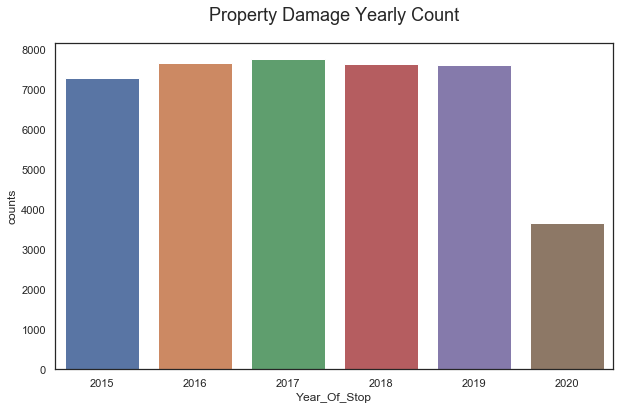

In [49]:
df = Property.groupby(['Year_Of_Stop']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Year_Of_Stop',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Property Damage Yearly Count', fontsize=18, position=(0.5,1.05))

Text(0.5, 1.05, 'Injury Crash Yearly Count')

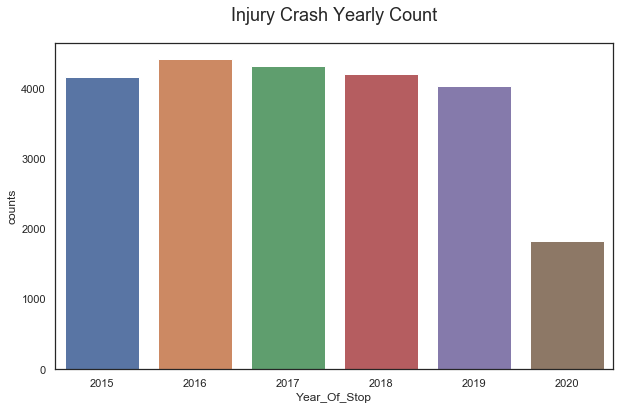

In [48]:
df1 = Injury.groupby(['Year_Of_Stop']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Year_Of_Stop',
            y='counts',
            ax=ax,
            data=df1)
ax.set_title('Injury Crash Yearly Count', fontsize=18, position=(0.5,1.05))

Text(0.5, 1.05, 'Fatal Crash Yearly Count')

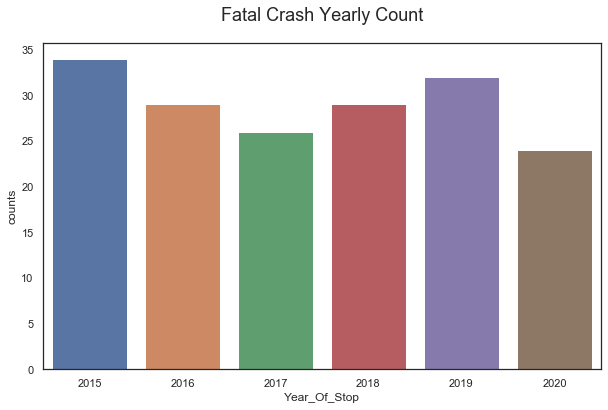

In [50]:
df2 = Fatal.groupby(['Year_Of_Stop']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Year_Of_Stop',
            y='counts',
            ax=ax,
            data=df2)
ax.set_title('Fatal Crash Yearly Count', fontsize=18, position=(0.5,1.05))

Text(0.5, 1.05, 'Fatal Crash Monthly Count')

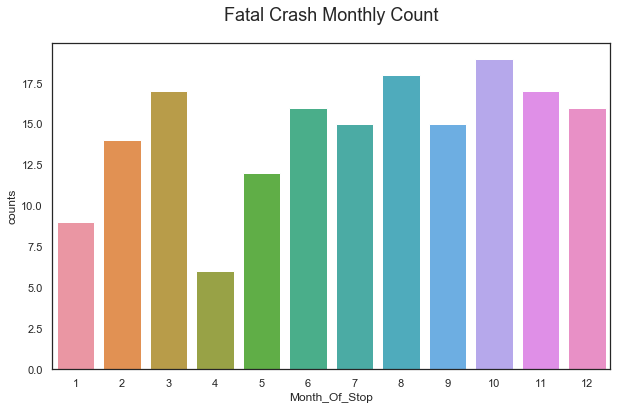

In [53]:
Fatal = data[data["ACRS Report Type"]=='Fatal Crash']
df2 = Fatal.groupby(['Month_Of_Stop']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Month_Of_Stop',
            y='counts',
            ax=ax,
            data=df2)
ax.set_title('Fatal Crash Monthly Count', fontsize=18, position=(0.5,1.05))

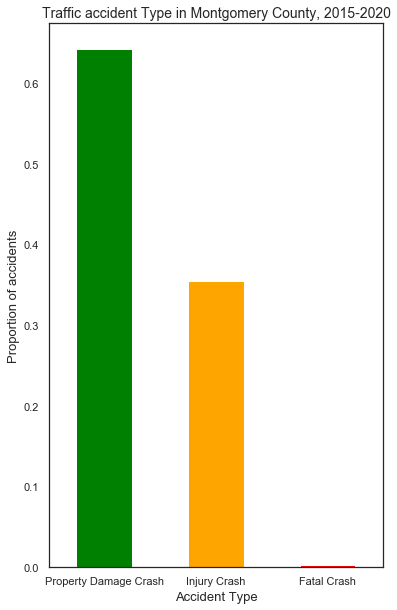

In [25]:
fig = plt.figure(figsize=(6,10))
data["ACRS Report Type"].value_counts(normalize=True).plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Traffic accident Type in Montgomery County, 2015-2020', fontsize=14)
plt.xlabel('Accident Type', fontsize=13)
plt.ylabel('Proportion of accidents', fontsize=13)
plt.xticks(rotation=0)
plt.show()

In [28]:
data["First Harmful Event"].value_counts(normalize=True)

OTHER VEHICLE                     0.689134
FIXED OBJECT                      0.122743
PARKED VEHICLE                    0.097426
PEDESTRIAN                        0.039241
OFF ROAD                          0.011096
ANIMAL                            0.009573
BICYCLE                           0.009449
OTHER OBJECT                      0.007553
OTHER                             0.003295
OVERTURN                          0.002595
UNKNOWN                           0.001803
BACKING                           0.001461
OTHER NON COLLISION               0.001321
OTHER CONVEYANCE                  0.000901
OTHER PEDALCYCLE                  0.000497
THROWN OR FALLING OBJECT          0.000482
FELL JUMPED FROM MOTOR VEHICLE    0.000357
SPILLED CARGO                     0.000264
DOWNHILL RUNAWAY                  0.000233
U-TURN                            0.000171
JACKKNIFE                         0.000124
RAILWAY TRAIN                     0.000109
EXPLOSION OR FIRE                 0.000078
UNITS SEPAR

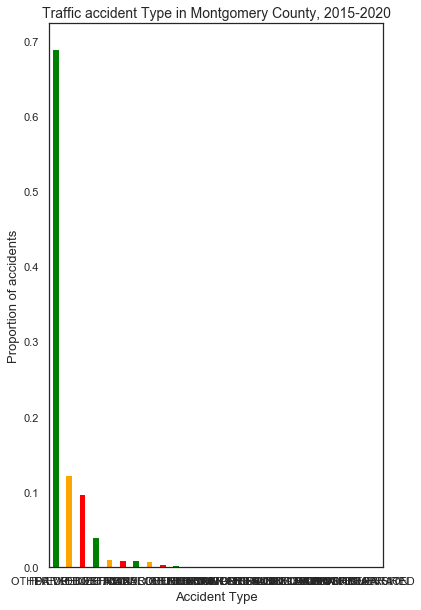

In [26]:
fig = plt.figure(figsize=(6,10))
data["First Harmful Event"].value_counts(normalize=True).plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Traffic accident Type in Montgomery County, 2015-2020', fontsize=14)
plt.xlabel('Accident Type', fontsize=13)
plt.ylabel('Proportion of accidents', fontsize=13)
plt.xticks(rotation=0)
plt.show()

C:\Users\ywei1\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ywei1\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ywei1\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ywei1\Anaconda3\lib\site-

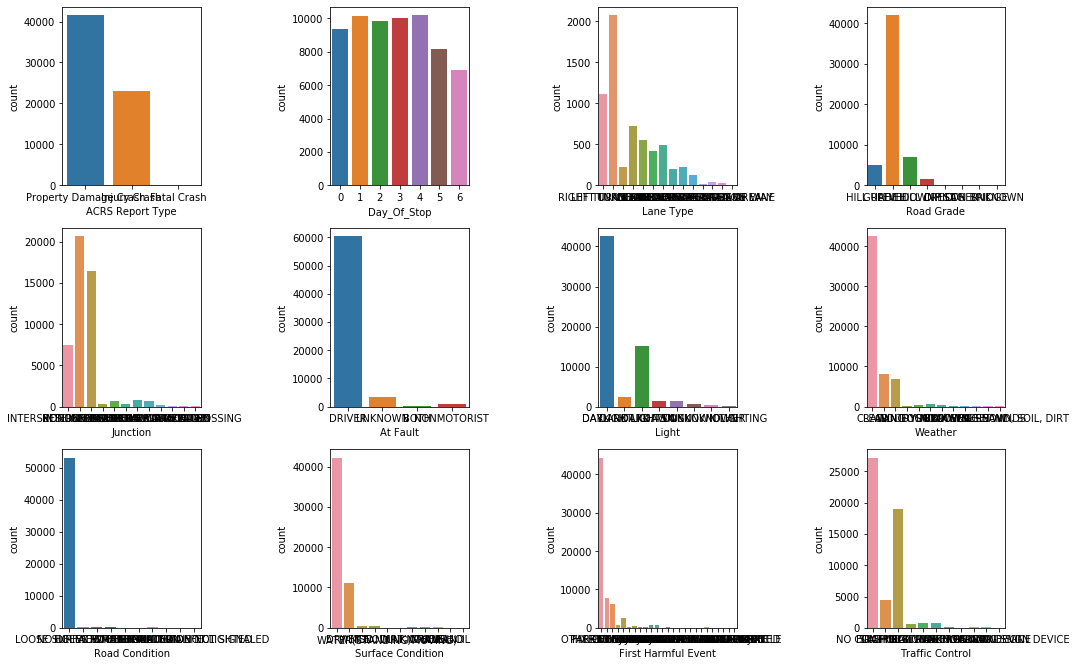

In [19]:
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(441)
sns.countplot(data['ACRS Report Type'])
ax2 = plt.subplot(442)
sns.countplot(data['Day_Of_Stop'])
ax3 = plt.subplot(443)
sns.countplot(data['Lane Type'])
ax4 = plt.subplot(444)
sns.countplot(data['Road Grade'])
ax5 = plt.subplot(445)
sns.countplot(data['Junction'])
ax6 = plt.subplot(446)
sns.countplot(data['At Fault'])
ax7 = plt.subplot(447)
sns.countplot(data['Light'])
ax8 = plt.subplot(448)
sns.countplot(data['Weather'])
ax9 = plt.subplot(449)
sns.countplot(data['Road Condition'])
ax10 = plt.subplot(4,4,10)
sns.countplot(data['Surface Condition'])
ax11 = plt.subplot(4,4,11)
sns.countplot(data['First Harmful Event'])
ax12 = plt.subplot(4,4,12)
sns.countplot(data['Traffic Control'])
plt.tight_layout()
plt.show()

In [154]:
data["Agency Name"].value_counts()

Montgomery County Police     56172
Rockville Police Departme     3966
Gaithersburg Police Depar     2773
Takoma Park Police Depart     1194
Maryland-National Capital      543
MCPARK                          52
Name: Agency Name, dtype: int64

In [155]:
data['Driver Substance Abuse'].value_counts()

NONE DETECTED                                     40839
NONE DETECTED, UNKNOWN                             3218
UNKNOWN                                            3164
N/A, NONE DETECTED                                 2080
ALCOHOL PRESENT                                    1424
ALCOHOL PRESENT, NONE DETECTED                      956
N/A, UNKNOWN                                        755
ALCOHOL CONTRIBUTED                                 571
ALCOHOL CONTRIBUTED, NONE DETECTED                  308
ALCOHOL PRESENT, N/A                                298
ALCOHOL CONTRIBUTED, N/A                             99
ILLEGAL DRUG PRESENT                                 95
ILLEGAL DRUG PRESENT, NONE DETECTED                  70
MEDICATION PRESENT                                   38
ILLEGAL DRUG PRESENT, N/A                            31
MEDICATION PRESENT, NONE DETECTED                    30
ILLEGAL DRUG CONTRIBUTED, NONE DETECTED              28
COMBINED SUBSTANCE PRESENT                      

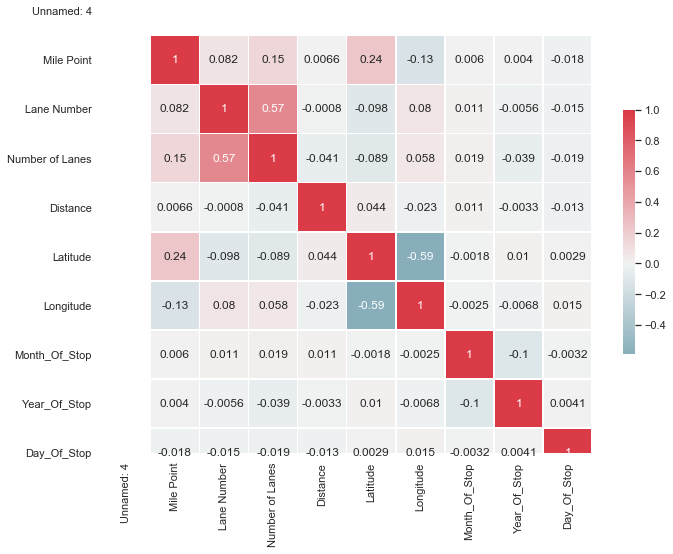

In [20]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

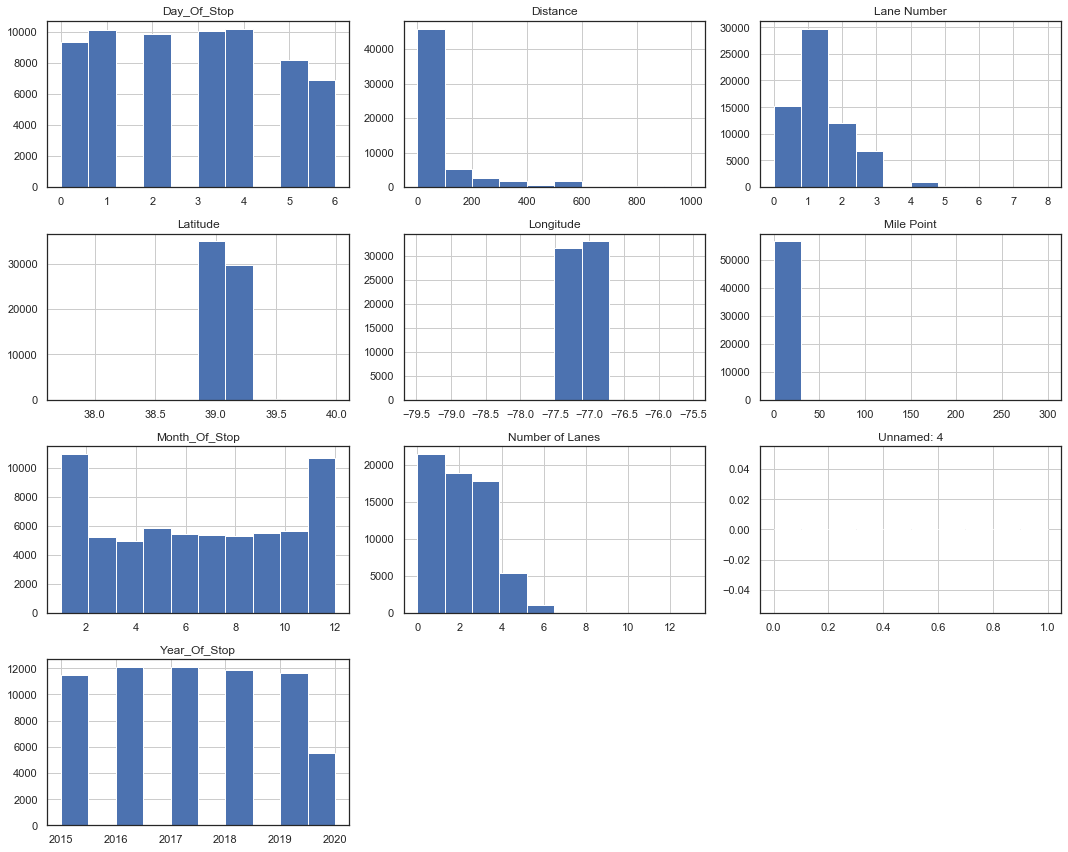

In [21]:
data.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

Text(-8.824999999999996, 0.5, 'Count')

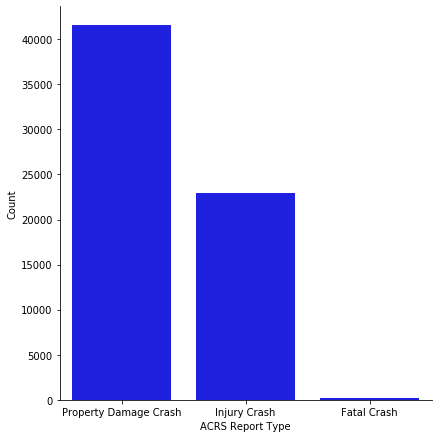

In [157]:
sns.catplot(x='ACRS Report Type',
           kind='count',
            height=6, 
            aspect=1,
        color = 'b',
           data=data)
plt.xticks(size=10)
plt.yticks(size=10)
ax.set_title('Report Type', fontsize=38)

plt.ylabel('Count', fontsize=10)

In [158]:
data['Related Non-Motorist'].value_counts()

PEDESTRIAN                       2551
BICYCLIST                         767
OTHER                             146
OTHER CONVEYANCE                   34
MACHINE OPERATOR/RIDER             15
OTHER, PEDESTRIAN                   5
BICYCLIST, PEDESTRIAN               5
OTHER PEDALCYCLIST                  4
BICYCLIST, OTHER                    3
IN ANIMAL-DRAWN VEH                 1
MACHINE OPERATOR/RIDER, OTHER       1
OTHER, OTHER CONVEYANCE             1
Name: Related Non-Motorist, dtype: int64

In [159]:
data['At Fault'].value_counts()

DRIVER         60305
UNKNOWN         3447
NONMOTORIST      841
BOTH             107
Name: At Fault, dtype: int64

Text(-8.699999999999996, 0.5, 'Count')

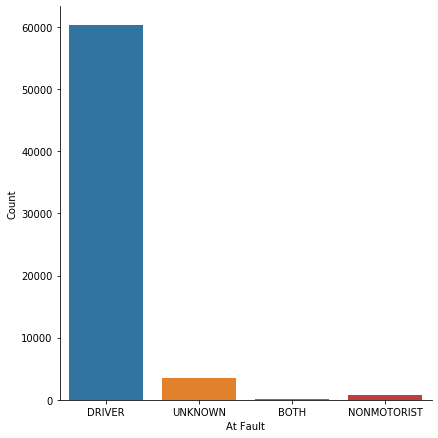

In [160]:
sns.catplot(x='At Fault',
           kind='count',
            height=6, 
            aspect=1,
        
           data=data)
plt.xticks(size=10)
plt.yticks(size=10)
ax.set_title('Driver At Fault', fontsize=38)

plt.ylabel('Count', fontsize=10)

Text(0.5, 1.05, 'Report Type')

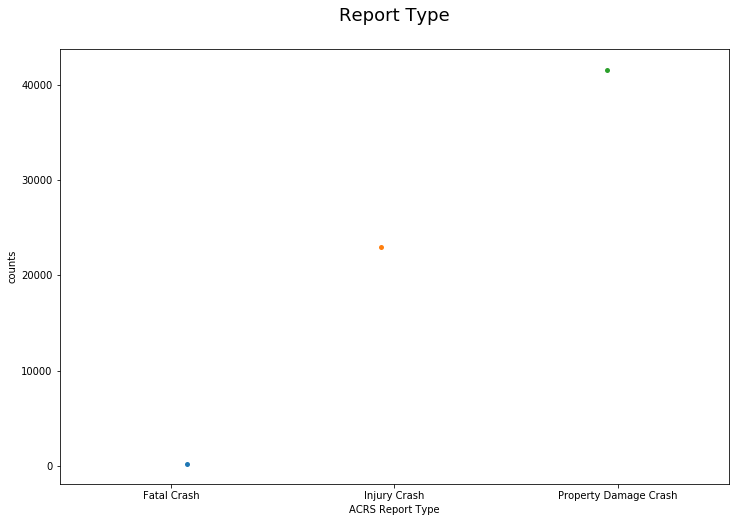

In [161]:
df = data.groupby(['ACRS Report Type']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12,8))
sns.stripplot(x ='ACRS Report Type',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Report Type', fontsize=18, position=(0.5,1.05))

Text(-8.824999999999996, 0.5, 'Count')

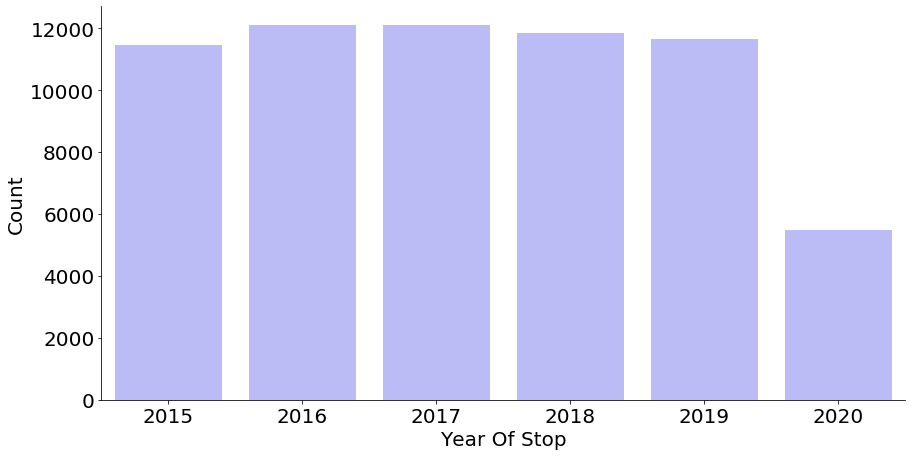

In [163]:
# Incidents by year
sns.catplot(x='Year_Of_Stop',
           kind='count',
            height=6, 
            aspect=2,
        color = 'b',alpha=0.3,
           data=data)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Year Of Stop', fontsize=20)
plt.ylabel('Count', fontsize=20)

Text(-2.4499999999999957, 0.5, 'Count')

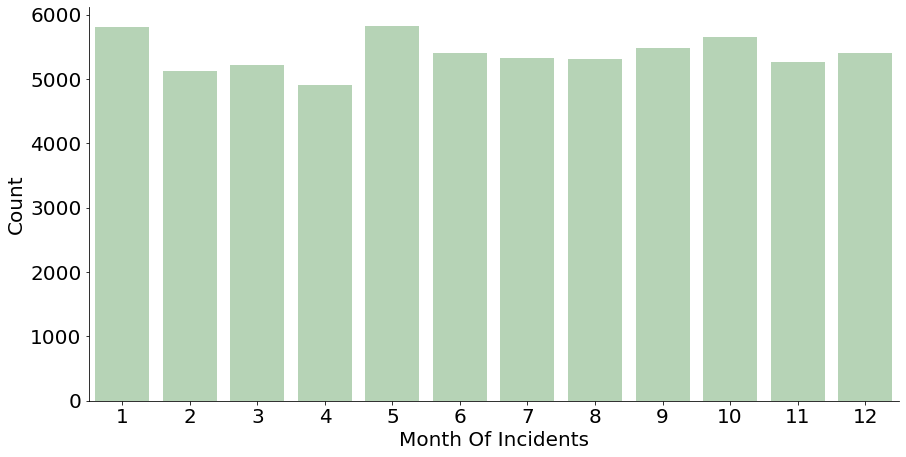

In [164]:
# Incidents by year
sns.catplot(x='Month_Of_Stop',
           kind='count',
            height=6, 
            aspect=2,
        color = 'g', alpha=0.3,
           data=data)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Month Of Incidents', fontsize=20)
plt.ylabel('Count', fontsize=20)

Text(-8.699999999999996, 0.5, 'Count')

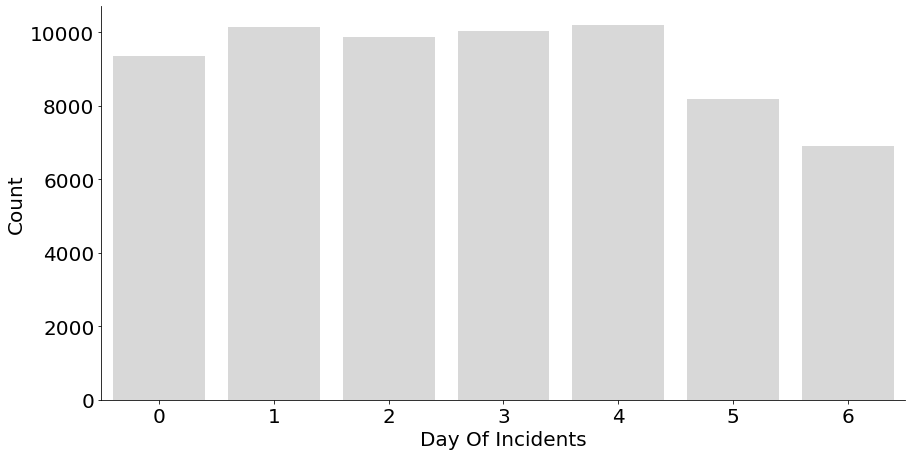

In [165]:
# Incidents by year
sns.catplot(x='Day_Of_Stop',
           kind='count',
            height=6, 
            aspect=2,
        color = 'grey', alpha=0.3,
           data= data)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Day Of Incidents', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [166]:
col = 'Light'
strs = data[col].value_counts()
strs

DAYLIGHT                    42510
DARK LIGHTS ON              15177
DARK NO LIGHTS               2339
DUSK                         1492
DAWN                         1325
DARK -- UNKNOWN LIGHTING      729
UNKNOWN                       441
OTHER                         155
Name: Light, dtype: int64

In [167]:
value_map = dict((v, i) for i,v in enumerate(strs.index))
value_map

{'DAYLIGHT': 0,
 'DARK LIGHTS ON': 1,
 'DARK NO LIGHTS': 2,
 'DUSK': 3,
 'DAWN': 4,
 'DARK -- UNKNOWN LIGHTING': 5,
 'UNKNOWN': 6,
 'OTHER': 7}

In [168]:
data1 = data.replace({col:value_map})[col].head(15)

In [169]:
data1.head()

0    0.0
1    0.0
2    2.0
3    0.0
4    0.0
Name: Light, dtype: float64

In [170]:
data['Related Non-Motorist'].value_counts().head(20)

PEDESTRIAN                       2551
BICYCLIST                         767
OTHER                             146
OTHER CONVEYANCE                   34
MACHINE OPERATOR/RIDER             15
OTHER, PEDESTRIAN                   5
BICYCLIST, PEDESTRIAN               5
OTHER PEDALCYCLIST                  4
BICYCLIST, OTHER                    3
IN ANIMAL-DRAWN VEH                 1
MACHINE OPERATOR/RIDER, OTHER       1
OTHER, OTHER CONVEYANCE             1
Name: Related Non-Motorist, dtype: int64

In [171]:
data["Collision Type"].value_counts()

SAME DIR REAR END               17984
SINGLE VEHICLE                  10622
STRAIGHT MOVEMENT ANGLE          9654
OTHER                            8766
SAME DIRECTION SIDESWIPE         5616
HEAD ON LEFT TURN                4253
HEAD ON                          1332
SAME DIRECTION RIGHT TURN        1263
SAME DIRECTION LEFT TURN         1222
OPPOSITE DIRECTION SIDESWIPE     1019
ANGLE MEETS LEFT TURN             660
UNKNOWN                           476
ANGLE MEETS RIGHT TURN            387
SAME DIR REND RIGHT TURN          276
SAME DIR REND LEFT TURN           274
ANGLE MEETS LEFT HEAD ON          231
SAME DIR BOTH LEFT TURN           230
OPPOSITE DIR BOTH LEFT TURN       108
Name: Collision Type, dtype: int64

## Where do fatal violation occur?

In [172]:
data['Location'].value_counts().head(50)

(38.953, -77.338)              26
(39.11342767, -77.23648183)    15
(39.045425, -76.99073667)      13
(39.04627667, -76.990695)      13
(39.109775, -76.91044)         10
(39.11061, -76.98979833)       10
(39.05350158, -77.08949028)     9
(39.08277, -76.94851333)        7
(39.72, -79.486)                7
(39.219, -76.665)               6
(39.04696082, -77.0523119)      6
(38.743373, -77.54699707)       6
(39.06579, -77.15987333)        5
(39.02343, -76.98676)           5
(39.02236169, -76.97770779)     5
(39.16944675, -77.19071671)     5
(38.96338833, -77.08674)        5
(39.11943158, -77.16584444)     5
(39.05355448, -77.10676484)     4
(39.1163582, -77.2080545)       4
(38.983415, -77.09292167)       4
(39.14561093, -77.01339598)     4
(39.16247733, -77.28282094)     4
(38.98345167, -77.09292)        4
(39.16781773, -77.18322515)     4
(38.989125, -76.987761)         4
(38.98749422, -76.98683119)     4
(39.0806167, -77.1438885)       4
(39.08333833, -76.9455)         4
(39.08559333, 

In [173]:
# some latitude and logitude information missing, I plan to drop them 
data["Latitude"].value_counts()

38.953000    26
39.113428    15
39.046277    13
39.045425    13
39.110610    10
39.109775    10
39.053502     9
39.082770     8
39.720000     7
38.983415     6
39.046961     6
39.219000     6
38.743373     6
38.999768     5
39.023430     5
39.140527     5
38.983452     5
39.058285     5
39.169447     5
39.046515     5
39.047119     5
39.119432     5
39.055667     5
39.104997     5
39.045269     5
39.065790     5
38.963388     5
39.022362     5
39.050000     5
39.081497     4
             ..
39.012615     1
39.050412     1
39.106128     1
39.076320     1
39.071137     1
39.091916     1
39.140060     1
39.079151     1
39.000917     1
39.126365     1
39.074548     1
39.151157     1
39.005045     1
39.015143     1
39.069181     1
39.126282     1
39.174833     1
39.140508     1
39.301612     1
39.072232     1
39.052320     1
39.260413     1
39.132740     1
39.147706     1
38.980304     1
39.233965     1
39.133953     1
39.092644     1
39.062299     1
39.071157     1
Name: Latitude, Length: 

In [174]:
data["Longitude"].value_counts()

-77.338000    26
-77.236482    15
-76.990695    14
-76.990737    13
-76.989798    10
-76.910440    10
-77.089490     9
-79.486000     7
-77.079623     7
-76.948513     7
-77.086740     6
-77.077074     6
-77.159873     6
-77.546997     6
-76.665000     6
-76.977307     6
-77.052312     6
-77.149988     5
-77.183225     5
-77.077088     5
-77.203960     5
-76.986760     5
-77.077063     5
-76.977708     5
-77.026903     5
-76.988765     5
-77.205162     5
-77.076388     5
-77.165844     5
-77.190717     5
              ..
-77.436040     1
-77.073153     1
-77.112839     1
-77.266408     1
-77.137183     1
-77.127131     1
-77.246977     1
-77.216445     1
-77.034267     1
-76.964255     1
-77.070913     1
-76.976423     1
-77.178857     1
-77.102500     1
-77.269833     1
-77.272135     1
-77.253023     1
-77.146702     1
-77.267138     1
-77.047652     1
-76.972625     1
-77.113220     1
-77.278535     1
-77.153352     1
-77.074843     1
-77.050333     1
-77.073453     1
-77.290939    

In [175]:
# choose location data without 0 values
df_data = data.loc[(data['Latitude'] != 0.000000) & (data['Longitude'] != 0.000000)]

In [176]:
df_data

Report Number                Agency Name       ACRS Report Type  \
0       MCP9365000Y   Montgomery County Police  Property Damage Crash   
1       MCP2651001R   Montgomery County Police           Injury Crash   
2       MCP2970000J   Montgomery County Police  Property Damage Crash   
3       MCP2473000Y   Montgomery County Police  Property Damage Crash   
4       MCP2298009K   Montgomery County Police  Property Damage Crash   
5       MCP1213003V   Montgomery County Police  Property Damage Crash   
6       MCP2437002P   Montgomery County Police  Property Damage Crash   
7       MCP2740000Y   Montgomery County Police  Property Damage Crash   
8       MCP3020000N   Montgomery County Police  Property Damage Crash   
9        DD56050019  Rockville Police Departme  Property Damage Crash   
10      MCP2813003T   Montgomery County Police  Property Damage Crash   
11      MCP1417005B   Montgomery County Police           Injury Crash   
12      MCP30070018   Montgomery County Police  Property Damage Crash   
13      MCP1334004P   Montgomery County Police           Injury Crash   
14       EJ7856006C  Gaithersburg Police Depar           Injury Crash   
15      MCP2914004D   Montgomery County Police  Property Damage Crash   
16      MCP15190010   Montgomery County Police           Injury Crash   
17      MCP0704001S   Montgomery County Police  Property Damage Crash   
18      MCP11190045   Montgomery County Police           Injury Crash   
19      MCP2677001H   Montgomery County Police           Injury Crash   
20      MCP2875000Z   Montgomery County Police  Property Damage Crash   
21      MCP3002000N   Montgomery County Police  Property Damage Crash   
22      MCP2818003L   Montgomery County Police  Property Damage Crash   
23      MCP2820000Y   Montgomery County Police           Injury Crash   
24      MCP22120024   Montgomery County Police           Injury Crash   
25      MCP30360009   Montgomery County Police           Injury Crash   
26      MCP2724001V   Montgomery County Police  Property Damage Crash   
27      MCP2726001P   Montgomery County Police           Injury Crash   
28      MCP15540030   Montgomery County Police           Injury Crash   
29      MCP2534001F   Montgomery County Police  Property Damage Crash   
...             ...                        ...                    ...   
64670   MCP28770066   Montgomery County Police  Property Damage Crash   
64671   MCP27530015   Montgomery County Police  Property Damage Crash   
64672   MCP9442000Q   Montgomery County Police           Injury Crash   
64673   MCP9366000Q   Montgomery County Police  Property Damage Crash   
64674   MCP2717004K   Montgomery County Police  Property Damage Crash   
64675   MCP2720001S   Montgomery County Police  Property Damage Crash   
64676   MCP2900002B   Montgomery County Police  Property Damage Crash   
64677   MCP2888000X   Montgomery County Police  Property Damage Crash   
64678    DD5502004V  Rockville Police Departme           Injury Crash   
64679   MCP26890018   Montgomery County Police  Property Damage Crash   
64680   MCP137800CQ   Montgomery County Police           Injury Crash   
64681    DD55950041  Rockville Police Departme  Property Damage Crash   
64682    DD5598002F  Rockville Police Departme  Property Damage Crash   
64683   MCP2927002G   Montgomery County Police  Property Damage Crash   
64684   MCP2278002H   Montgomery County Police  Property Damage Crash   
64685   MCP2789001C   Montgomery County Police  Property Damage Crash   
64686   MCP30310024   Montgomery County Police           Injury Crash   
64687   MCP22090020   Montgomery County Police           Injury Crash   
64688   MCP2444000T   Montgomery County Police  Property Damage Crash   
64689    EJ7850000L  Gaithersburg Police Depar  Property Damage Crash   
64690   MCP08330012   Montgomery County Police           Injury Crash   
64691   MCP2656000N   Montgomery County Police           Injury Crash   
64692   MCP25360010   Montgomery County Police           Injury 

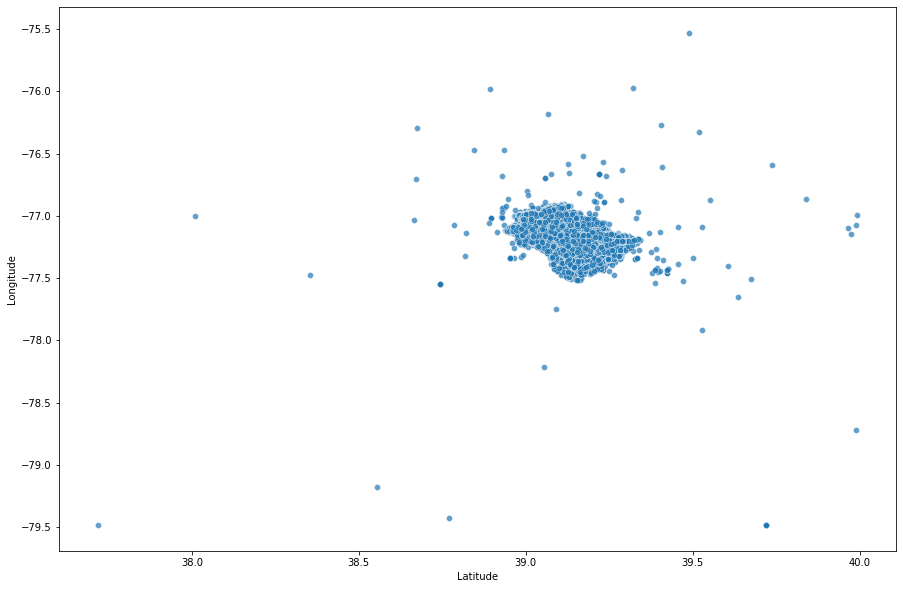

In [178]:
fig = plt.figure()
fig.set_size_inches(15,10)
sns.scatterplot(x='Latitude', y='Longitude',
                alpha=0.7,
               data=df_data)

In [179]:
from datetime import datetime
dt = df_data["Crash Date"]

dt = dt.apply(lambda x:datetime.strptime(x, '%m/%d/%Y'))

df_data["Month_Of_Stop"] = dt.map(lambda x: x.month)
df_data["Year_Of_Stop"] = dt.map(lambda x: x.year)
df_data["Day_Of_Stop"] = dt.map(lambda x: x.dayofweek)

In [180]:
# Create basic Folium map
violation_map = folium.Map(location=[39.118742,-77.38028], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df_data[df_data.Year_Of_Stop == 2018]
data_heatmap = df_data[['Latitude','Longitude']]
data_heatmap = df_data.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(violation_map)

# Plot!
violation_map

## let's look at data with Fatal Accident

In [181]:
data["Fatal"].value_counts()

KeyError: 'Fatal'

In [182]:
data_fatal = data[data['ACRS Report Type'] == 'Fatal Crash']

In [183]:
data_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 204 to 63184
Data columns (total 17 columns):
Report Number             174 non-null object
Agency Name               174 non-null object
ACRS Report Type          174 non-null object
Crash Date                174 non-null object
Crash Time                174 non-null object
Related Non-Motorist      75 non-null object
At Fault                  174 non-null object
Collision Type            174 non-null object
Weather                   160 non-null object
Light                     174 non-null object
Driver Substance Abuse    163 non-null object
Latitude                  174 non-null float64
Longitude                 174 non-null float64
Location                  174 non-null object
Month_Of_Stop             174 non-null int64
Year_Of_Stop              174 non-null int64
Day_Of_Stop               174 non-null int64
dtypes: float64(2), int64(3), object(12)
memory usage: 24.5+ KB


In [184]:
data_fatal.head()

Report Number               Agency Name ACRS Report Type  Crash Date  \
204    MCP1301000C  Montgomery County Police      Fatal Crash   7/16/2015   
297    MCP1301000T  Montgomery County Police      Fatal Crash   6/20/2017   
695    MCP2563000J  Montgomery County Police      Fatal Crash   2/13/2017   
792    MCP21340016  Montgomery County Police      Fatal Crash  10/21/2017   
1665   MCP2563000Q  Montgomery County Police      Fatal Crash    5/6/2018   

       Crash Time Related Non-Motorist At Fault           Collision Type  \
204   10:53:00 AM           PEDESTRIAN   DRIVER           SINGLE VEHICLE   
297   10:44:00 AM           PEDESTRIAN  UNKNOWN  STRAIGHT MOVEMENT ANGLE   
695    3:57:00 PM                  NaN   DRIVER           SINGLE VEHICLE   
792    2:33:00 AM           PEDESTRIAN  UNKNOWN                    OTHER   
1665   3:03:00 AM           PEDESTRIAN  UNKNOWN                    OTHER   

      Weather           Light          Driver Substance Abuse   Latitude  \
204     CLEAR        DAYLIGHT                   NONE DETECTED  39.055359   
297     CLEAR        DAYLIGHT          NONE DETECTED, UNKNOWN  39.174933   
695     CLEAR        DAYLIGHT                         UNKNOWN  39.165220   
792     CLEAR  DARK LIGHTS ON                             NaN  39.129115   
1665  RAINING  DARK LIGHTS ON  ALCOHOL PRESENT, NONE DETECTED  39.073645   

      Longitude                     Location  Month_Of_Stop  Year_Of_Stop  \
204  -77.083522  (39.05535932, -77.08352208)              7          2015   
297  -77.260467  (39.17493347, -77.26046741)              6          2017   
695  -77.084084    (39.16522036, -77.084084)              2          2017   
792  -77.166022    (39.129115, -77.16602167)             10          2017   
1665 -76.955704  (39.07364508, -76.95570409)              5          2018   

      Day_Of_Stop  
204             3  
297             1  
695             0  
792             5  
1665            6

In [185]:
data_fatal['Weather'].value_counts()

CLEAR           127
CLOUDY           15
RAINING          15
WINTRY MIX        1
FOGGY             1
SEVERE WINDS      1
Name: Weather, dtype: int64

In [186]:
data['Weather'].value_counts()

CLEAR                       42425
RAINING                      8150
CLOUDY                       6753
SNOW                          699
UNKNOWN                       404
FOGGY                         272
WINTRY MIX                    182
OTHER                         147
SLEET                          86
SEVERE WINDS                   67
BLOWING SNOW                   56
BLOWING SAND, SOIL, DIRT        7
Name: Weather, dtype: int64

In [187]:
data_fatal = df_data[df_data['ACRS Report Type'] == 'Fatal Crash']

## It's stange why 259 fatal violation don't involved an accident? 
YES if traffic violation involved an accident.

## I / 495 @ CONNECTICUT AVENUE and VEIRS MILL  RD / CLARIDGE RD seems have most fatal violations

In [189]:
rename = {'Violation Type':'Violation_Type',
         'Personal Injury':'Personal_Injury',
         'Work Zone':'Work_Zone',
         'Commercial Vehicle':'Commercial_Vehicle',
         'Property Damage':'Property_Damage'}
data_fatal.rename(index=str, columns=rename, inplace=True)

## When do fatal violation occur?
We can consider patterns across several different time scales: hours of the day, days of the week, and months of the year.

In [191]:
# get the year, month and weekday of the date of stop for analyse
import datetime
from datetime import datetime
dt = data_fatal["Crash Date"]

dt = dt.apply(lambda x:datetime.strptime(x, '%m/%d/%Y'))

data_fatal["Month_Of_Stop"] = dt.map(lambda x: x.month)
data_fatal["Year_Of_Stop"] = dt.map(lambda x: x.year)
data_fatal["Day_Of_Stop"] = dt.map(lambda x: x.dayofweek)


C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [192]:
data_fatal['Year_Of_Stop'].value_counts()

2015    34
2019    32
2018    29
2016    29
2017    26
2020    24
Name: Year_Of_Stop, dtype: int64

Text(9.924999999999983, 0.5, 'Count')

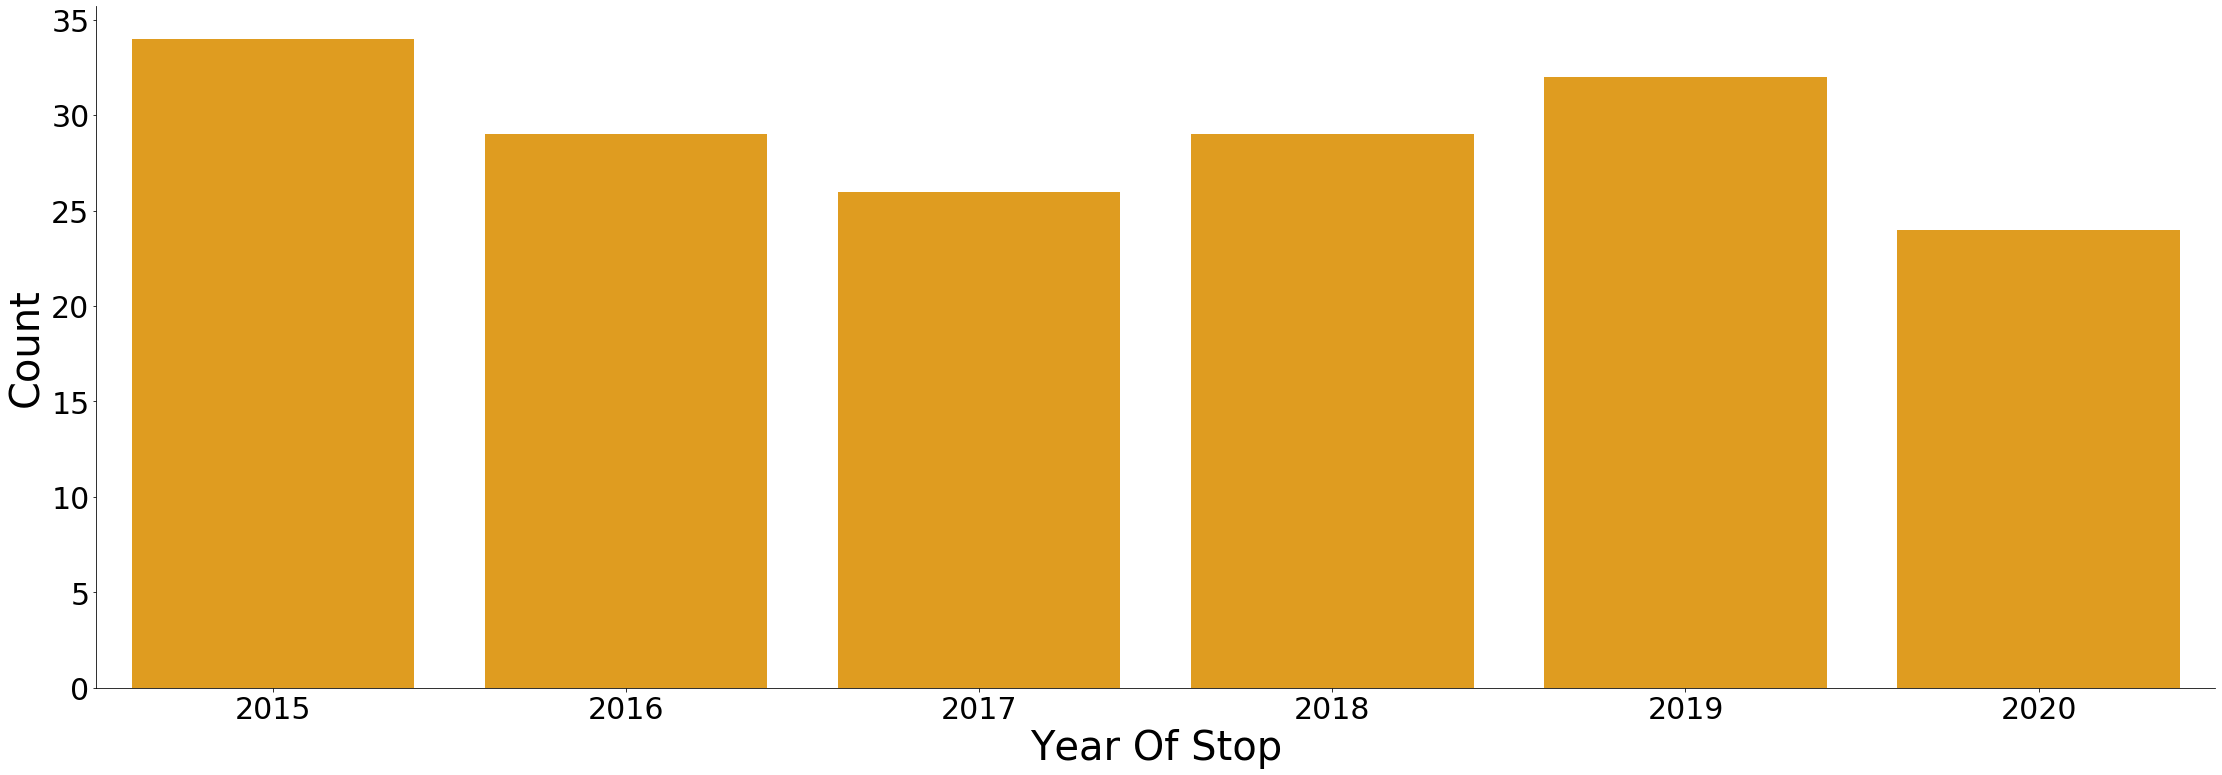

In [193]:
# Violation by year
sns.catplot(x='Year_Of_Stop',
           kind='count',
            height=10, 
            aspect=3,
            color='Orange',
           data=data_fatal)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Year Of Stop', fontsize=40)
plt.ylabel('Count', fontsize=40)

## after a decrease in 2016 and 2017, there is an increase in 2018 and 2019. Why?


Text(9.925000000000004, 0.5, 'Count')

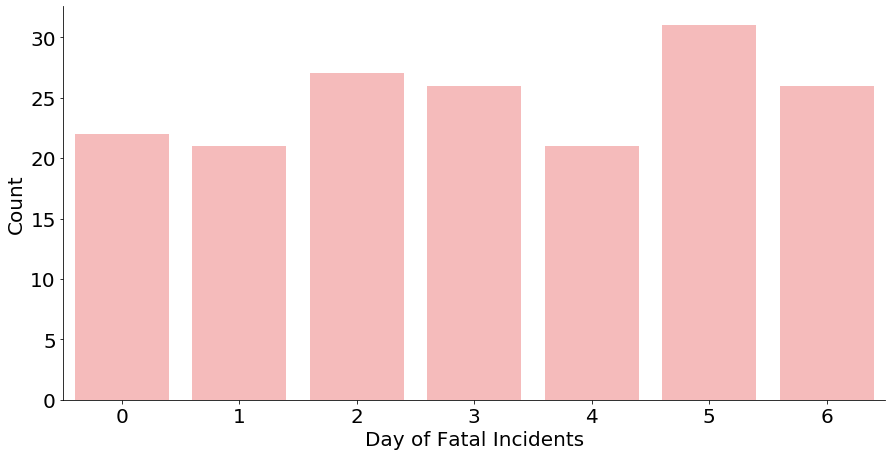

In [201]:
# Violation by day of week
sns.catplot(x='Day_Of_Stop',
           kind='count',
            height=6, 
            aspect=2, alpha=0.3, color ='r',
           data =data_fatal)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Day of Fatal Incidents', fontsize=20)
plt.ylabel('Count', fontsize=20)

## 0 for Monday and 6 for Sunday. The highest count shows in Saturday.

Text(0.29999999999998295, 0.5, 'Count')

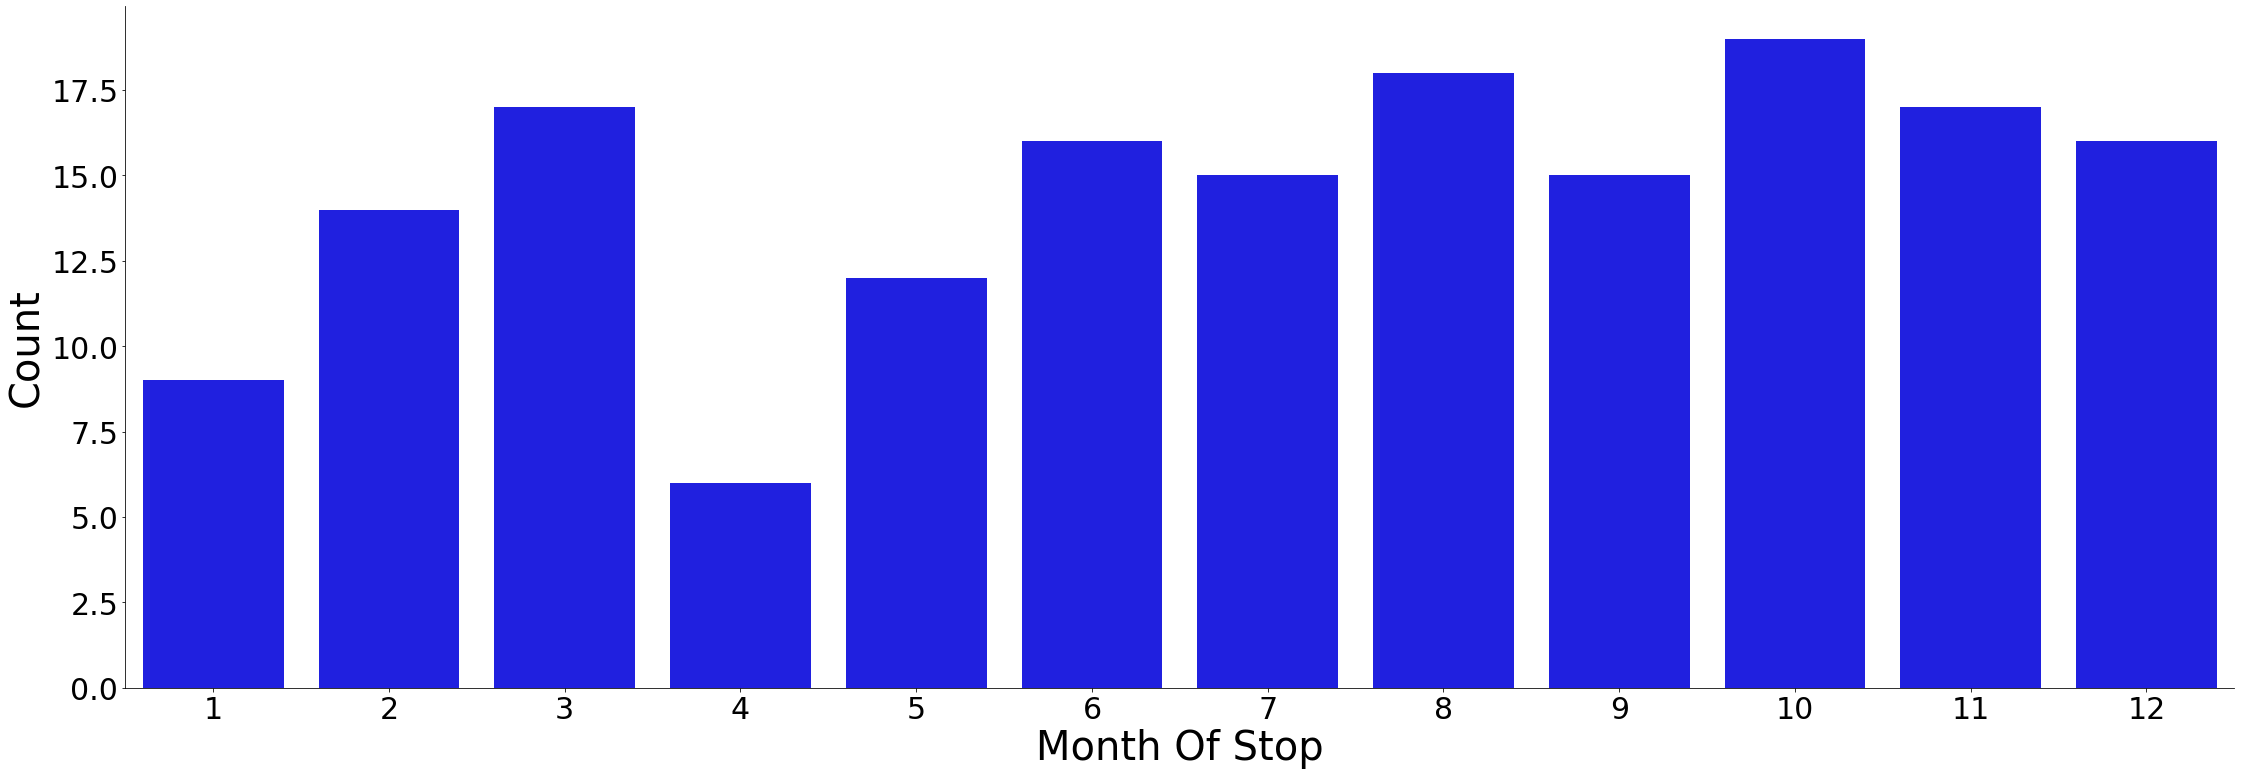

In [42]:
# Violation by month
sns.catplot(x='Month_Of_Stop',
           kind='count',
            height=10, 
            aspect=3,
            color='Blue',
           data=data_fatal)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month Of Stop', fontsize=40)
plt.ylabel('Count', fontsize=40)

## the highest counts show in June and March. Are these related to Weather, let's explore more. 

Text(0.5, 1.05, 'Counts by Date')

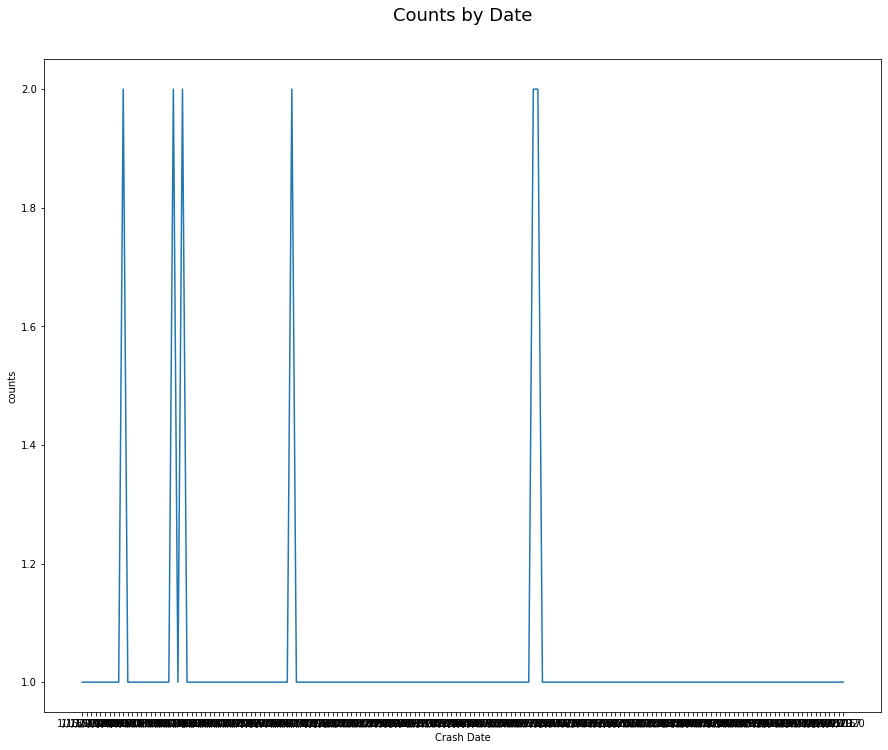

In [206]:
df_fatal = data_fatal.groupby(['Crash Date']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(15,12))
sns.lineplot(x ='Crash Date',
            y='counts',
            ax=ax,
            data=df_fatal)
ax.set_title('Counts by Date', fontsize=18, position=(0.5,1.05))

In [125]:
for column in data_fatal.drop(columns=['Longitude', 'Latitude','Date Of Stop',
                                       'Time Of Stop','Description','Location','Violation_Type',
                                      'Month_Of_Stop','Year_Of_Stop','Day_Of_Stop']).columns:
    data_fatal[column] = data_fatal[column].replace(['Yes', 'No'], [1, 0]).astype('int')
collect()
data_fatal.info()

C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 943 to 1670910
Data columns (total 20 columns):
Date Of Stop          406 non-null object
Time Of Stop          406 non-null object
Description           406 non-null object
Location              406 non-null object
Latitude              406 non-null float64
Longitude             406 non-null float64
Accident              406 non-null int32
Belts                 406 non-null int32
Personal_Injury       406 non-null int32
Property_Damage       406 non-null int32
Fatal                 406 non-null int32
Commercial License    406 non-null int32
HAZMAT                406 non-null int32
Commercial_Vehicle    406 non-null int32
Alcohol               406 non-null int32
Work_Zone             406 non-null int32
Violation_Type        406 non-null object
Month_Of_Stop         406 non-null int64
Year_Of_Stop          406 non-null int64
Day_Of_Stop           406 non-null int64
dtypes: float64(2), int32(10), int64(3), object(5)
memory usage: 

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680626 entries, 0 to 1680625
Data columns (total 21 columns):
Date Of Stop          1680626 non-null object
Time Of Stop          1680626 non-null object
Description           1680617 non-null object
Location              1680624 non-null object
Latitude              1680626 non-null float64
Longitude             1680626 non-null float64
Accident              0 non-null float64
Belts                 0 non-null float64
Personal Injury       1680626 non-null object
Property Damage       1680626 non-null object
Fatal                 0 non-null float64
Commercial License    0 non-null float64
HAZMAT                0 non-null float64
Commercial Vehicle    1680626 non-null object
Alcohol               0 non-null float64
Work Zone             1680626 non-null object
Violation Type        1680626 non-null object
Personal_Injury       0 non-null float64
Property_Damage       0 non-null float64
Commercial_Vehicle    0 non-null float64
Work_Zone 

In [142]:
data['Fatal'] = data["Fatal"].replace(['Yes', 'No'], [1, 0]).astype('int')

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [134]:
data.head(2)

Date Of Stop Time Of Stop                                 Description  \
0   07/30/2019     22:15:00  EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH   
1   07/07/2019     22:54:00                FAILURE TO STOP AT STOP SIGN   

                     Location   Latitude  Longitude  Accident  Belts  \
0  RIVER RD/ROYAL DOMINION DR  38.990102 -77.151645       NaN    NaN   
1   ENNALLS AVE @ GEORGIA AVE  39.040360 -77.051137       NaN    NaN   

  Personal Injury Property Damage  ...  Commercial License  HAZMAT  \
0              No              No  ...                 NaN     NaN   
1              No              No  ...                 NaN     NaN   

   Commercial Vehicle Alcohol  Work Zone Violation Type Personal_Injury  \
0                  No     NaN         No        Warning             NaN   
1                  No     NaN         No        Warning             NaN   

   Property_Damage  Commercial_Vehicle  Work_Zone  
0              NaN                 NaN        NaN  
1              NaN                 NaN        NaN  

[2 rows x 21 columns]

In [207]:
data['Personal Injury'].value_counts()
    

KeyError: 'Personal Injury'

ValueError: zero-size array to reduction operation minimum which has no identity

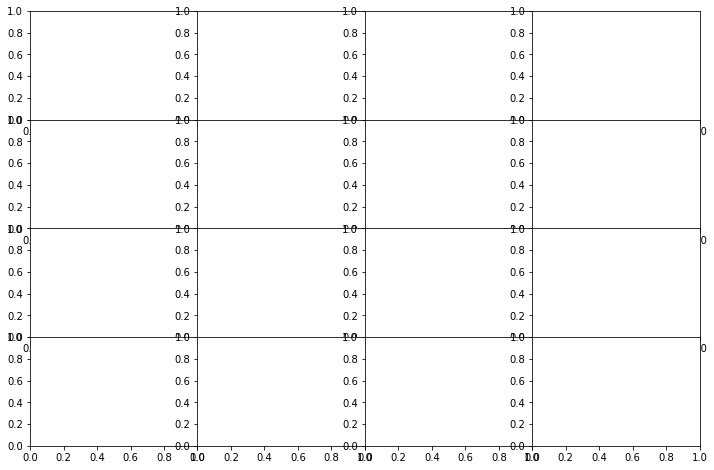

In [133]:
from pandas.plotting import scatter_matrix 
attributes = ['Fatal','Belts','Alcohol','HAZMAT']
scatter_matrix(data[attributes],figsize =(12,8))

C:\Users\ywei1\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\ywei1\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ywei1\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ywei1\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ywei1\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: Use

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BE49CA1D0>,
      dtype=object)

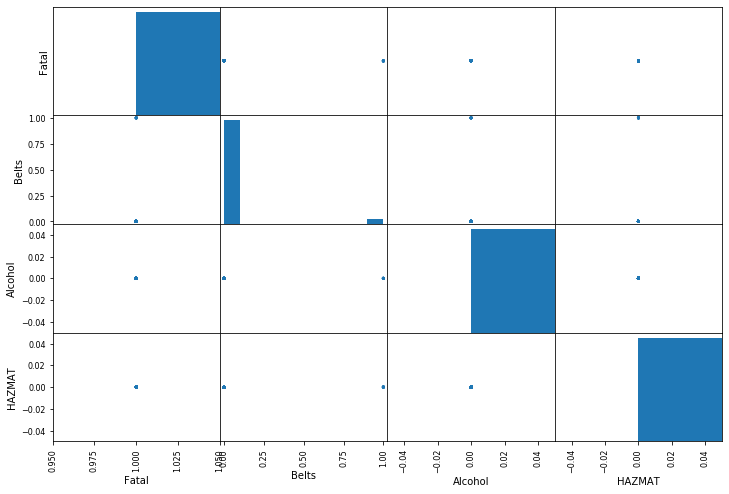

In [126]:
from pandas.plotting import scatter_matrix 
attributes = ['Fatal','Belts','Alcohol','HAZMAT']
scatter_matrix(data_fatal[attributes],figsize =(12,8))

Text(0.5, 1.05, 'Counts by Year')

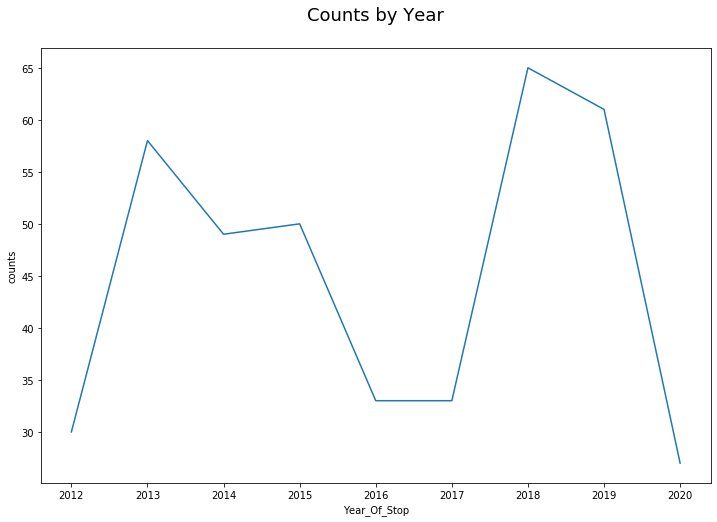

In [109]:
df_fatal = data_fatal.groupby(['Year_Of_Stop']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x ='Year_Of_Stop',
            y='counts',
            ax=ax,
            data=df_fatal)
ax.set_title('Counts by Year', fontsize=18, position=(0.5,1.05))

Text(0.5, 1.05, 'Counts by Month')

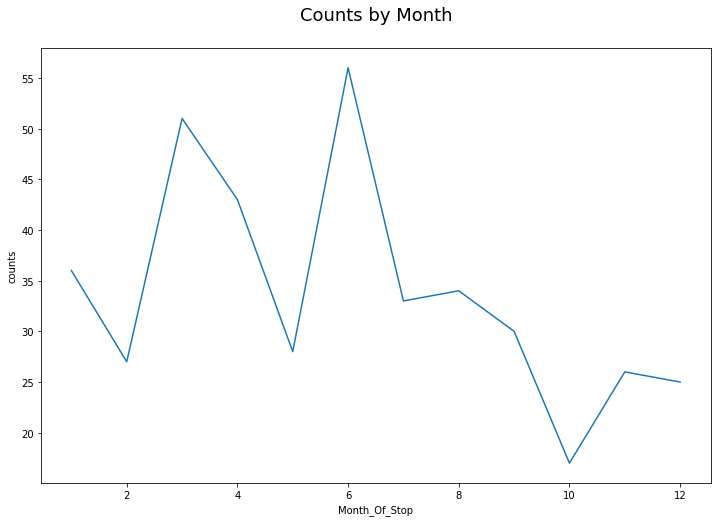

In [111]:
df_fatal = data_fatal.groupby(['Month_Of_Stop']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x ='Month_Of_Stop',
            y='counts',
            ax=ax,
            data=df_fatal)
ax.set_title('Counts by Month', fontsize=18, position=(0.5,1.05))

Text(0, 0.5, 'counts')

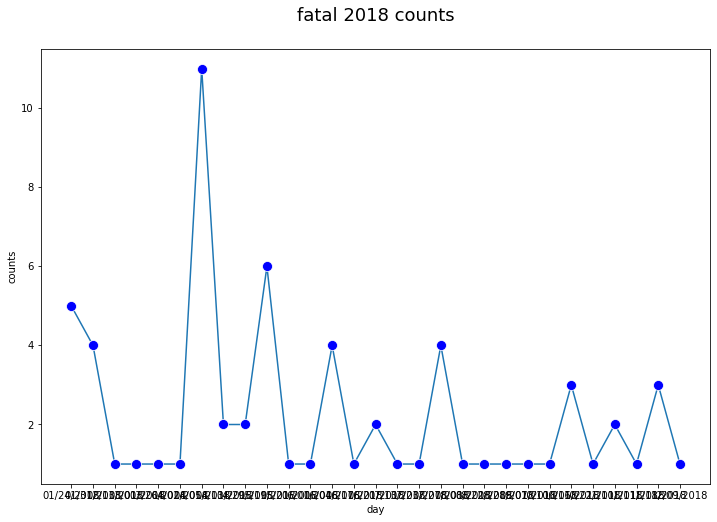

In [102]:
data_fatal2018 = data_fatal[data_fatal.Year_Of_Stop == 2018].groupby(['Date Of Stop']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x ='Date Of Stop',
            y='counts',
            ax=ax,
            data=data_fatal2018,marker='o',
         markerfacecolor='blue', markersize=10)
ax.set_title('fatal 2018 counts', fontsize=18, position=(0.5,1.05))
plt.xlabel('day')

plt.ylabel('counts')



Text(0, 0.5, 'counts')

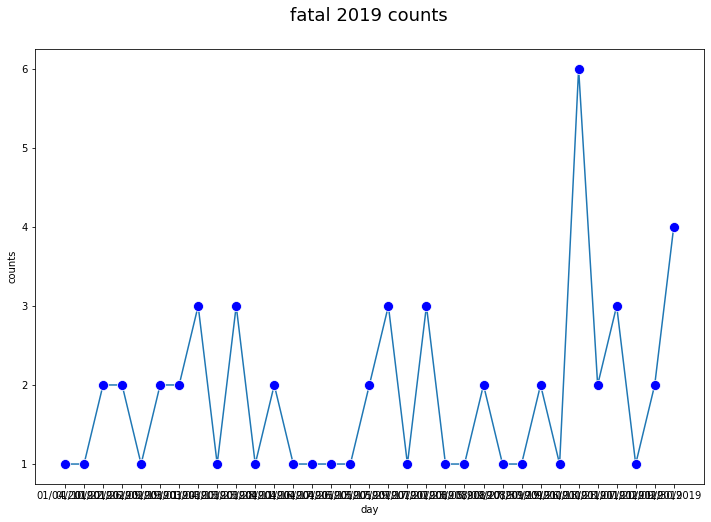

In [103]:
data_fatal2019 = data_fatal[data_fatal.Year_Of_Stop == 2019].groupby(['Date Of Stop']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x ='Date Of Stop',
            y='counts',
            ax=ax,
            data=data_fatal2019,marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('day')
ax.set_title('fatal 2019 counts', fontsize=18, position=(0.5,1.05))
plt.ylabel('counts')



Text(0, 0.5, 'counts')

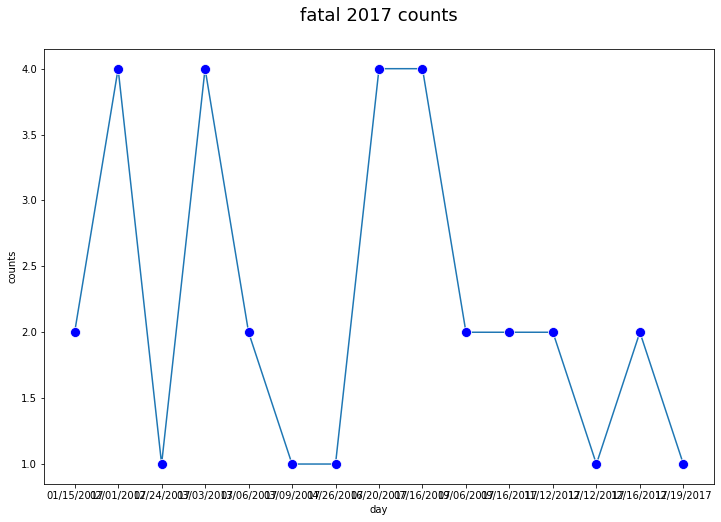

In [104]:
data_fatal2017 = data_fatal[data_fatal.Year_Of_Stop == 2017].groupby(['Date Of Stop']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x ='Date Of Stop',
            y='counts',
            ax=ax,
            data=data_fatal2017,marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('day')
ax.set_title('fatal 2017 counts', fontsize=18, position=(0.5,1.05))
plt.ylabel('counts')



In [47]:
data_fatal2018 = data_fatal[data_fatal.Year_Of_Stop == 2018].groupby(['Date Of Stop']).size().reset_index(name='counts')
data_fatal2018.describe()

counts
count  29.000000
mean    2.241379
std     2.198298
min     1.000000
25%     1.000000
50%     1.000000
75%     3.000000
max    11.000000

In [48]:
data_fatal2018

Date Of Stop  counts
0    01/24/2018       5
1    01/31/2018       4
2    02/13/2018       1
3    03/01/2018       1
4    03/26/2018       1
5    04/02/2018       1
6    04/05/2018      11
7    04/13/2018       2
8    04/29/2018       2
9    05/19/2018       6
10   05/21/2018       1
11   06/01/2018       1
12   06/04/2018       4
13   06/17/2018       1
14   06/21/2018       2
15   07/13/2018       1
16   07/23/2018       1
17   07/27/2018       4
18   08/08/2018       1
19   08/22/2018       1
20   08/28/2018       1
21   09/07/2018       1
22   10/10/2018       1
23   10/16/2018       3
24   10/22/2018       1
25   11/10/2018       2
26   11/11/2018       1
27   11/18/2018       3
28   12/09/2018       1

In [53]:
data_fatal04052018 = data_fatal[data_fatal['Date Of Stop'] == '04/05/2018']

In [54]:
data_fatal04052018 

Date Of Stop Time Of Stop  \
375202   04/05/2018     16:15:00   
524538   04/05/2018     16:15:00   
524982   04/05/2018     16:15:00   
525276   04/05/2018     16:15:00   
526093   04/05/2018     16:15:00   
526753   04/05/2018     16:15:00   
527541   04/05/2018     16:15:00   
528374   04/05/2018     16:15:00   
528659   04/05/2018     16:15:00   
528954   04/05/2018     16:15:00   
712748   04/05/2018     16:15:00   

                                              Description  \
375202  FAIL OF DRIVER IN ATTEND VEH ACCIDENT TO FURNI...   
524538  KNOWINGLY GIVING FALSE ACCIDENT REPORT INFORMA...   
524982                         FOLLOWING VEH. TOO CLOSELY   
525276  FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...   
526093  FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...   
526753  FAILURE TO STOP AFTER ACCIDENT INVOLVING DAMAG...   
527541               DRIVING VEH. WHILE WEARING EARPHONES   
528374  FAILURE OF VEH. DRIVER INVOLVED IN ACCIDENT TO...   
528659  NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
528954  DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...   
712748  DRIVER FAILURE TO OBEY DESIGNATED LANE DIRECTIONS   

                            Location  Latitude  Longitude Accident Belts  \
375202  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
524538  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
524982  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
525276  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
526093  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
526753  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
527541  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
528374  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
528659  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
528954  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   
712748  I / 495 @ CONNECTICUT AVENUE       0.0        0.0       No    No   

       Personal_Injury Property_Damage Fatal Commercial License HAZMAT  \
375202              No              No   Yes                 No     No   
524538              No              No   Yes                 No     No   
524982              No              No   Yes                 No     No   
525276              No              No   Yes                 No     No   
526093              No              No   Yes                 No     No   
526753              No              No   Yes                 No     No   
527541              No              No   Yes                 No     No   
528374              No              No   Yes                 No     No   
528659              No              No   Yes                 No     No   
528954              No              No   Yes                 No     No   
712748              No              No   Yes                 No     No   

       Commercial_Vehicle Alcohol Work_Zone Violation_Type  Month_Of_Stop  \
375202                 No      No        No       Citation              4   
524538                 No      No        No        Warning              4   
524982                 No      No        No        Warning              4   
525276                 No      No        No        Warning              4   
526093                 No      No        No        Warning              4   
526753                 No      No        No        Warning              4   
527541                 No      No        No        Warning              4   
528374                 No      No        No        Warning              4   
528659                 No      No        No        Warning              4   
528954                 No      No        No        Warning              4   
712748                 No      No        No        Warning              4   

        Year_Of_Stop  Day_Of_Stop  
375202          2018            3  
524538          2018            3  
524982

似乎明显有问题啊，fatal却没有accident，同一个时间地点

In [55]:
data_fatal05192018 = data_fatal[data_fatal['Date Of Stop'] == '05/19/2018']

In [56]:
data_fatal05192018

Date Of Stop Time Of Stop  \
246233   05/19/2018     13:42:00   
247069   05/19/2018     13:42:00   
247814   05/19/2018     13:42:00   
251255   05/19/2018     13:42:00   
252150   05/19/2018     13:42:00   
252749   05/19/2018     13:42:00   

                                              Description  \
246233  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 52 MPH I...   
247069  NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
247814  FAILING TO SECURE CHILD UNDER AGE 8 IN CHILD S...   
251255  PERSON DRIVING MOTOR VEH. ON HWY. W/O TIRES IN...   
252150  FAILING TO SECURE CHILD UNDER AGE 8 IN CHILD S...   
252749  DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   

                                      Location  Latitude  Longitude Accident  \
246233  MONTROSE PARKWAY/EAST JEFFERSON STREET       0.0        0.0      Yes   
247069  MONTROSE PARKWAY/EAST JEFFERSON STREET       0.0        0.0      Yes   
247814  MONTROSE PARKWAY/EAST JEFFERSON STREET       0.0        0.0      Yes   
251255  MONTROSE PARKWAY/EAST JEFFERSON STREET       0.0        0.0      Yes   
252150  MONTROSE PARKWAY/EAST JEFFERSON STREET       0.0        0.0      Yes   
252749  MONTROSE PARKWAY/EAST JEFFERSON STREET       0.0        0.0      Yes   

       Belts Personal_Injury Property_Damage Fatal Commercial License HAZMAT  \
246233    No              No              No   Yes                 No     No   
247069    No              No              No   Yes                 No     No   
247814    No              No              No   Yes                 No     No   
251255    No              No              No   Yes                 No     No   
252150    No              No              No   Yes                 No     No   
252749    No              No              No   Yes                 No     No   

       Commercial_Vehicle Alcohol Work_Zone Violation_Type  Month_Of_Stop  \
246233                 No      No        No       Citation              5   
247069                 No      No        No       Citation              5   
247814                 No      No        No       Citation              5   
251255                 No      No        No       Citation              5   
252150                 No      No        No       Citation              5   
252749                 No      No        No       Citation              5   

        Year_Of_Stop  Day_Of_Stop  
246233          2018            5  
247069          2018            5  
247814          2018            5  
251255          2018            5  
252150          2018            5  
252749          2018            5

In [57]:
data_fatal01242018 = data_fatal[data_fatal['Date Of Stop'] == '01/24/2018']

In [58]:
data_fatal01242018 

Date Of Stop Time Of Stop  \
918771   01/24/2018     16:36:00   
918972   01/24/2018     16:36:00   
919173   01/24/2018     16:36:00   
919376   01/24/2018     16:36:00   
919575   01/24/2018     16:36:00   

                                              Description  \
918771                  DRIVER CHANGING LANES WHEN UNSAFE   
918972  FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
919173  DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...   
919376  NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
919575             DRIVING VEH. WHILE IMPAIRED BY ALCOHOL   

                                   Location   Latitude  Longitude Accident  \
918771  E/B CHERRY HILL RD AT GRACEFIELD RD  39.045523 -76.991368       No   
918972  E/B CHERRY HILL RD AT GRACEFIELD RD  39.045523 -76.991368       No   
919173  E/B CHERRY HILL RD AT GRACEFIELD RD  39.045523 -76.991368       No   
919376  E/B CHERRY HILL RD AT GRACEFIELD RD  39.045523 -76.991368       No   
919575  E/B CHERRY HILL RD AT GRACEFIELD RD  39.045523 -76.991368       No   

       Belts Personal_Injury Property_Damage Fatal Commercial License HAZMAT  \
918771    No              No              No   Yes                 No     No   
918972    No              No              No   Yes                 No     No   
919173    No              No              No   Yes                 No     No   
919376    No              No              No   Yes                 No     No   
919575    No              No              No   Yes                 No     No   

       Commercial_Vehicle Alcohol Work_Zone Violation_Type  Month_Of_Stop  \
918771                 No      No        No       Citation              1   
918972                 No      No        No       Citation              1   
919173                 No      No        No       Citation              1   
919376                 No      No        No       Citation              1   
919575                 No      No        No       Citation              1   

        Year_Of_Stop  Day_Of_Stop  
918771          2018            2  
918972          2018            2  
919173          2018            2  
919376          2018            2  
919575          2018            2

In [ ]:
同一天同一个时间同一个地点，数据是否可靠？

## Where do violation occur?
We can use the latitude and longitude columns to plot the location. By setting the alpha parameter to a very small value, we can see that there are some 'hotspots'.

In [59]:
df_fatal= data_fatal[(data_fatal.T != 0.0000).any()]
data_fatal.dropna(axis=0, subset=['Latitude','Longitude'])

Date Of Stop Time Of Stop  \
943       04/13/2020     12:01:00   
944       04/13/2020     12:01:00   
1926      04/11/2019     14:24:00   
4115      03/04/2019     15:43:00   
4117      03/04/2019     15:43:00   
4120      03/04/2019     15:43:00   
9844      07/19/2020     14:47:00   
10210     06/01/2020     18:29:00   
11103     04/11/2019     14:24:00   
14696     08/05/2019     06:39:00   
20849     05/17/2019     13:23:00   
24106     08/28/2015     06:15:00   
25748     08/27/2019     07:47:00   
25924     03/23/2019     21:30:00   
30894     06/06/2012     00:44:00   
31426     01/14/2012     11:54:00   
31441     08/14/2013     17:17:00   
31557     06/06/2012     00:44:00   
31952     03/23/2019     21:30:00   
34475     04/02/2018     23:56:00   
37360     02/01/2017     16:57:00   
39421     08/14/2013     17:17:00   
39503     02/01/2017     16:57:00   
40178     08/14/2013     17:17:00   
40214     06/18/2013     18:24:00   
40317     08/28/2015     06:15:00   
40906     06/18/2013     18:24:00   
42006     02/01/2017     16:57:00   
42173     06/18/2013     18:24:00   
42828     09/01/2020     13:21:00   
...              ...          ...   
1335187   08/28/2018     21:30:00   
1336044   03/27/2015     23:42:00   
1360685   04/07/2015     00:23:00   
1368748   03/13/2019     16:28:00   
1370901   07/19/2013     22:37:00   
1371457   03/28/2014     22:47:00   
1388155   07/29/2014     16:01:00   
1388185   08/22/2014     17:39:00   
1423406   06/10/2014     21:40:00   
1423407   06/10/2014     21:40:00   
1430436   04/20/2014     00:46:00   
1451752   06/14/2014     21:39:00   
1465794   05/18/2016     13:25:00   
1480862   03/22/2016     06:57:00   
1487921   01/31/2018     21:39:00   
1487922   01/31/2018     21:39:00   
1487923   01/31/2018     21:39:00   
1487924   01/31/2018     21:39:00   
1493539   11/11/2018     01:32:00   
1508378   11/04/2014     16:57:00   
1538401   03/18/2016     03:07:00   
1538632   07/23/2018     13:07:00   
1547406   01/12/2016     00:43:00   
1567236   02/24/2017     08:59:00   
1571412   10/22/2018     19:56:00   
1589387   03/26/2018     16:53:00   
1628354   04/29/2018     19:07:00   
1634966   02/02/2014     21:52:00   
1655066   04/26/2019     19:56:00   
1670910   02/09/2019     21:36:00   

                                               Description  \
943      DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...   
944      FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
1926     NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
4115     DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   
4117     FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
4120     NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
9844              DRIVER FAILURE TO STOP AT STOP SIGN LINE   
10210    FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
11103    DRIVER FAILURE TO YIELD RIGHT-OF-WAY TO PEDEST...   
14696    EXCEEDING POSTED MAXIMUM SPEED LIMIT: 45 MPH I...   
20849    DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   
24106    FAILURE OF VEH. DRIVER TO USE CARE TO AVOID CO...   
25748             DRIVER FAILURE TO STOP AT STOP SIGN LINE   
25924    DRIVER FAILURE TO EXERCISE DUE CARE TO AVOID P...   
30894    EXCEEDING MAXIMUM SPEED: 95 MPH IN A POSTED 55...   
31426    EXCEEDING MAXIMUM SPEED: 39 MPH IN A POSTED 30...   
31441    KNOWINGLY DRIVING OWNER KNOWINGLY PERMITTING T...   
31557                    DRIVING WHILE IMPAIRED BY ALCOHOL   
31952    DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...   
34475    EXCEEDING POSTED MAXIMUM SPEED LIMIT: 64 MPH I...   
37360    DRIVER FAILURE TO EXERCISE DUE CARE TO AVOID P...   
39421    DRIVER FAIL TO MAKE REQUIRED STOP AT SIGNAL, S...   
39503    NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
40178    DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...   
40214    PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...   
40317                                    NEGLIGENT DRIVING   
40906    PERSON DRIVING MOTOR VEHICLE W

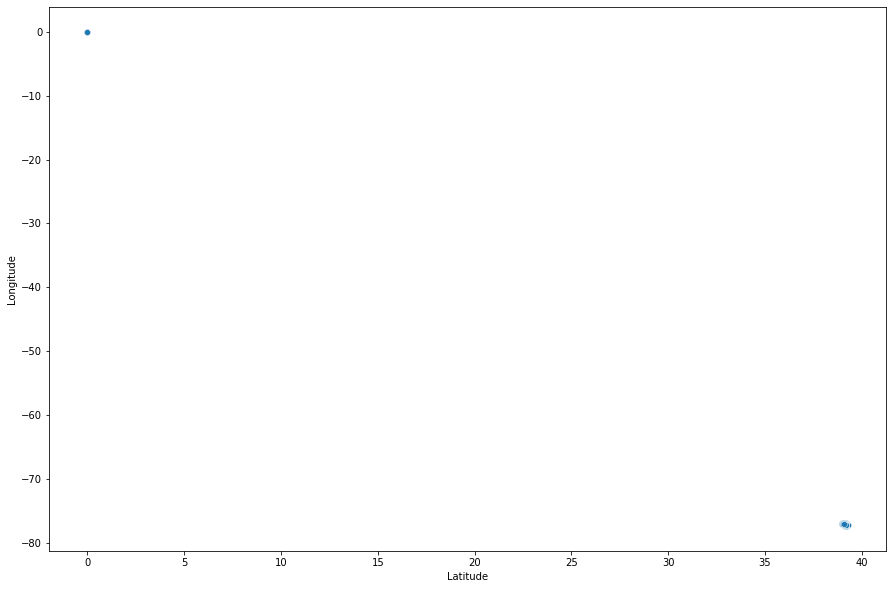

In [61]:
# Simple scatterplot

fig = plt.figure()
fig.set_size_inches(15,10)
sns.scatterplot(x='Latitude', y='Longitude',
                alpha=1,
               data=data_fatal)

In [101]:
# Create basic Folium map
violation_map = folium.Map(location=[39.118742,-77.38028], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
#data_heatmap = data_fatal[data_fatal.Year_Of_Stop == 2018]
data_heatmap = data_fatal[['Latitude','Longitude']]
data_heatmap = data_fatal.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(violation_map)

# Plot!
violation_map

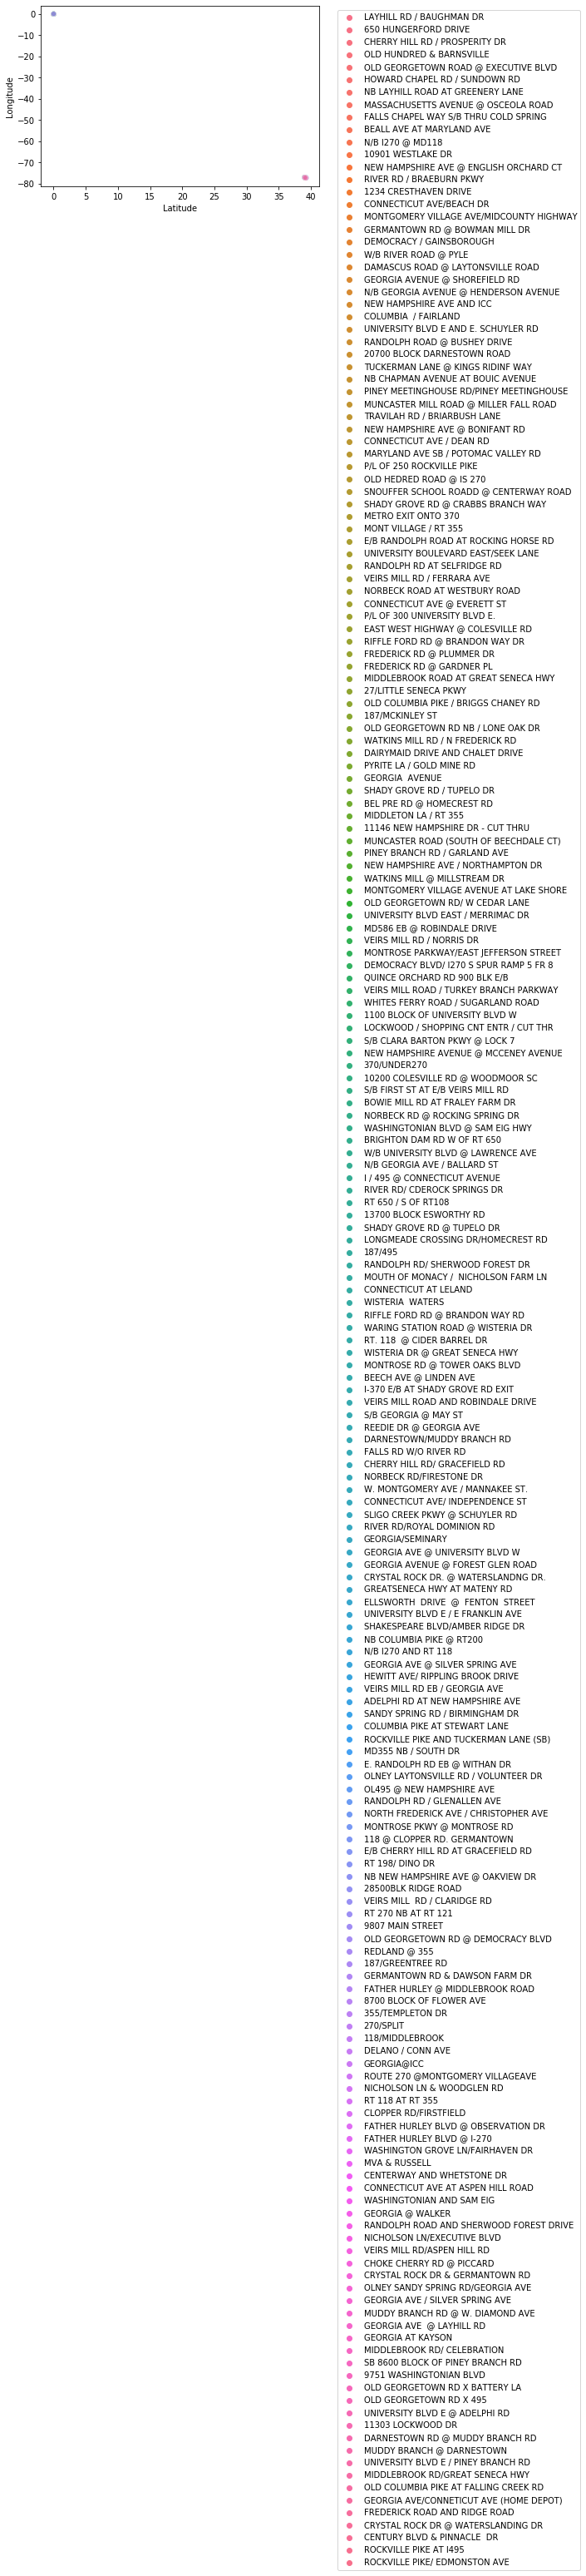

In [63]:
# Plot districts
sns.scatterplot(x='Latitude',
               y='Longitude',
                hue='Location',
                alpha=0.1,
               data=data_fatal)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

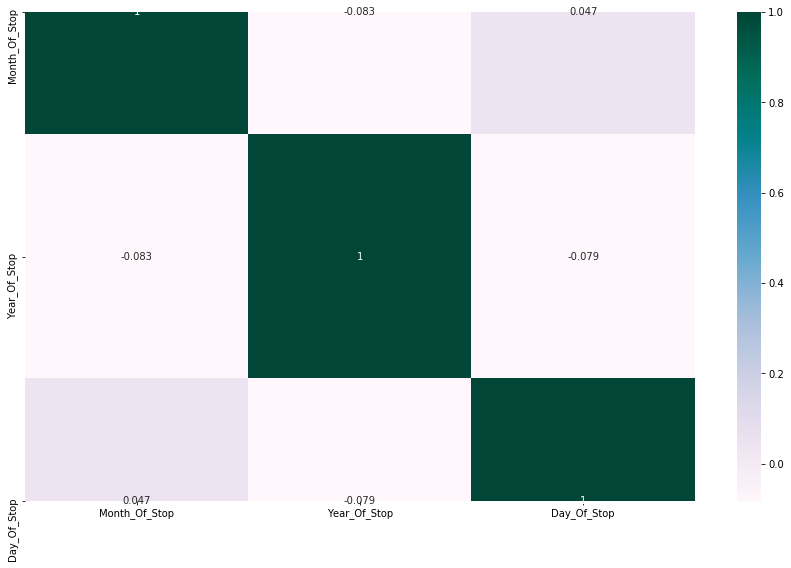

In [64]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data_fatal.drop(columns=['Longitude', 'Latitude']).corr(), cmap='PuBuGn', annot=True)

In [12]:
data = data[(-79.4772089<=data['Longitude']) & (data['Longitude']<=-75.049228) & (37.912465<=data['Latitude']) & (data['Latitude']<=39.7210786)]

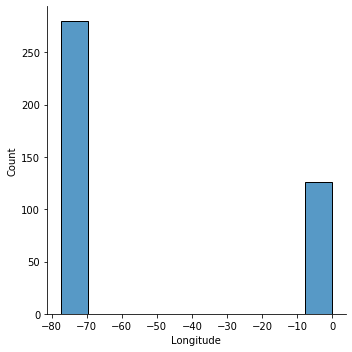

In [65]:
sns.displot(data_fatal['Longitude'])

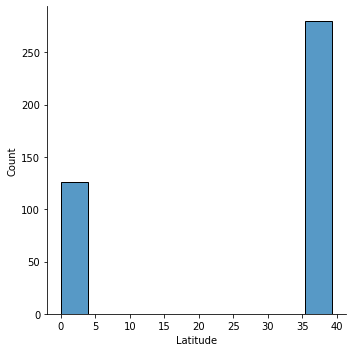

In [66]:
sns.displot(data_fatal['Latitude'])

In [67]:
for column in data_fatal.drop(columns=['Longitude', 'Latitude']).columns:
    data[column] = data_fatal[column].replace(['Yes', 'No'], [1, 0]).astype('uint8')
collect()
data_fatal.info()

ValueError: invalid literal for int() with base 10: '04/13/2020'

In [71]:
import seaborn as sns
import pandas as pd
import numpy as np

from gc import collect

#from mpl_toolkits.basemap import Basemap
from matplotlib import patheffects as path_effects
import matplotlib.pyplot as plt

from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.cluster import KMeans

N_CLUSTERS = 50

#del m
collect()

data['cluster'] = KMeans(n_clusters=N_CLUSTERS, n_init=1, max_iter=50, random_state=42).fit_predict(data_fatal[['Longitude', 'Latitude']])
data_groupby_cluster = data_fatal.groupby('cluster')
data_by_cluster = data_groupby_cluster.sum().reset_index(drop=True)
data_by_cluster['Longitude'] = data_groupby_cluster['Longitude'].mean()
data_by_cluster['Latitude'] = data_groupby_cluster['Latitude'].mean()
del data_groupby_cluster


ValueError: Length of values does not match length of index

In [73]:
data_fatal["Personal_Injury"].value_counts()

No    406
Name: Personal_Injury, dtype: int64

In [75]:
data_fatal["Commercial License"].value_counts()

No     387
Yes     19
Name: Commercial License, dtype: int64

In [77]:
data_fatal["Commercial_Vehicle"].value_counts()

No    406
Name: Commercial_Vehicle, dtype: int64

In [15]:
df2 = data.replace({'No': 0, 'Yes': 1})

In [22]:
df2['Commercial License'].astype(str).astype(int)

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1680596    0
1680597    0
1680598    0
1680599    0
1680600    0
1680601    0
1680602    0
1680603    0
1680604    0
1680605    0
1680606    0
1680607    0
1680608    0
1680609    0
1680610    0
1680611    0
1680612    0
1680613    0
1680614    0
1680615    0
1680616    0
1680617    0
1680618    0
1680619    0
1680620    0
1680621    0
1680622    0
1680623    0
1680624    0
1680625    0
Name: Commercial License, Length: 1680626, dtype: int32

In [24]:
df2.describe()

Latitude     Longitude      Accident         Belts  \
count  1.680626e+06  1.680626e+06  1.680626e+06  1.680626e+06   
mean   3.629887e+01 -7.162112e+01  2.497522e-02  3.077246e-02   
std    1.005192e+01  1.983361e+01  1.560496e-01  1.727007e-01   
min    0.000000e+00 -1.512560e+02  0.000000e+00  0.000000e+00   
25%    3.901521e+01 -7.718588e+01  0.000000e+00  0.000000e+00   
50%    3.906329e+01 -7.708172e+01  0.000000e+00  0.000000e+00   
75%    3.912789e+01 -7.702675e+01  0.000000e+00  0.000000e+00   
max    4.154316e+01  3.906443e+01  1.000000e+00  1.000000e+00   

       Personal Injury  Property Damage         Fatal  Commercial License  \
count     1.680626e+06     1.680626e+06  1.680626e+06        1.680626e+06   
mean      1.160282e-02     1.972896e-02  2.415767e-04        2.895052e-02   
std       1.070897e-01     1.390674e-01  1.554086e-02        1.676675e-01   
min       0.000000e+00     0.000000e+00  0.000000e+00        0.000000e+00   
25%       0.000000e+00     0.000000e+00  0.000000e+00        0.000000e+00   
50%       0.000000e+00     0.000000e+00  0.000000e+00        0.000000e+00   
75%       0.000000e+00     0.000000e+00  0.000000e+00        0.000000e+00   
max       1.000000e+00     1.000000e+00  1.000000e+00        1.000000e+00   

             HAZMAT  Commercial Vehicle       Alcohol     Work Zone  \
count  1.680626e+06        1.680626e+06  1.680626e+06  1.680626e+06   
mean   8.746741e-05        3.940198e-03  1.447675e-03  2.082557e-04   
std    9.351995e-03        6.264723e-02  3.802078e-02  1.442957e-02   
min    0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00        0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00        1.000000e+00  1.000000e+00  1.000000e+00   

       Search Conducted          Year  
count      1.047170e+06  1.670549e+06  
mean       7.101330e-02  2.006326e+03  
std        2.568472e-01  8.672413e+01  
min        0.000000e+00  0.000000e+00  
25%        0.000000e+00  2.002000e+03  
50%        0.000000e+00  2.007000e+03  
75%        0.000000e+00  2.012000e+03  
max        1.000000e+00  9.999000e+03

In [17]:
df2["Accident"].value_counts()

0    1638652
1      41974
Name: Accident, dtype: int64

In [18]:
df2["Accident"].describe()

count    1.680626e+06
mean     2.497522e-02
std      1.560496e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Accident, dtype: float64

In [121]:
cols = ['Report Number','Person ID','Vehicle ID','Local Case Number']
df2 = data.drop(cols, axis=1)

In [122]:
df2["Driver At Fault"].value_counts()

Yes        61498
No         50743
Unknown     2761
Name: Driver At Fault, dtype: int64

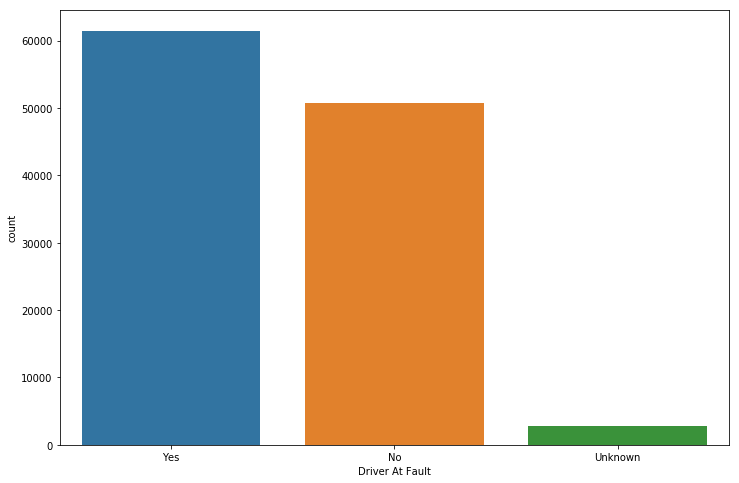

In [123]:
fig = plt.figure()
fig.set_size_inches(12,8)
sns.countplot(x='Driver At Fault',data=df2)

In [124]:
# Get numbers of colleges for which ADM_RATE has value 0
indexTopNames = df2[df2['Driver At Fault'] == 'No'].index
df2.drop(indexTopNames, inplace=True)


In [125]:
df2['Driverless Vehicle'].head(10)

0     No
1     No
2     No
7     No
9     No
10    No
11    No
13    No
14    No
17    No
Name: Driverless Vehicle, dtype: object

In [126]:
df2['Driverless Vehicle'] =df2['Driverless Vehicle'].replace({'No': 0, 'Yes': 1})

In [127]:
df2 = df2.replace({'No': 0, 'Yes': 1})

In [128]:
import sys
import re
#df2['Related Non-Motorist'] = df2 ['Related Non-Motorist'].fillna (0)


df2.head(5)

Agency Name       ACRS Report Type         Crash Date/Time  \
0  Montgomery County Police  Property Damage Crash  05/27/2019 07:30:00 PM   
1  Montgomery County Police  Property Damage Crash  05/24/2019 05:00:00 PM   
2  Montgomery County Police           Injury Crash  06/01/2019 10:08:00 AM   
7  Montgomery County Police  Property Damage Crash  05/30/2019 08:18:00 AM   
9  Montgomery County Police           Injury Crash  05/12/2019 02:00:00 PM   

         Route Type       Road Name Cross-Street Type Cross-Street Name  \
0               NaN             NaN               NaN               NaN   
1               NaN             NaN               NaN               NaN   
2               NaN             NaN               NaN               NaN   
7            County  SHADY GROVE RD            County        GAITHER RD   
9  Maryland (State)     GEORGIA AVE           Unknown   ENT TO BUSINESS   

                          Off-Road Description Municipality  \
0  IN FRONT OF 20211 GOSHEN RD (SAFEWAY STORE)          NaN   
1                                  PARKING LOT          NaN   
2            PARKING LOT OF 12801 WISTARIA DR.          NaN   
7                                          NaN          NaN   
9                                          NaN          NaN   

  Related Non-Motorist  ... Speed Limit Driverless Vehicle Parked Vehicle  \
0                  NaN  ...          10                  0              0   
1                  NaN  ...           0                  0              0   
2                  NaN  ...           0                  0              0   
7                  NaN  ...          45                  0              0   
9                  NaN  ...          35                  0              0   

  Vehicle Year Vehicle Make Vehicle Model Equipment Problems   Latitude  \
0         2014        HONDA        ACCORD            UNKNOWN  39.188426   
1            0          UNK           UNK                NaN  39.199047   
2         2004        HONDA           CRV          NO MISUSE  39.176520   
7         2009         HOND        ACCORD            UNKNOWN  39.117545   
9         2010        HONDA         CIVIC          NO MISUSE  39.085042   

   Longitude                     Location  
0 -77.185490       (39.188426, -77.18549)  
1 -77.250743  (39.19904667, -77.25074333)  
2 -77.268755       (39.17652, -77.268755)  
7 -77.188590    (39.1175449, -77.1885899)  
9 -77.079187  (39.08504167, -77.07918667)  

[5 rows x 39 columns]

In [134]:
df2['Crash Date/Time']= pd.to_datetime(df2['Crash Date/Time'])


In [135]:
df2['Crash Date/Time'].head(3)

0   2019-05-27 19:30:00
1   2019-05-24 17:00:00
2   2019-06-01 10:08:00
Name: Crash Date/Time, dtype: datetime64[ns]

In [132]:
df2['Parked Vehicle'].astype(str).astype(int)

0         0
1         0
2         0
7         0
9         0
10        0
11        0
13        0
14        0
17        0
18        0
20        0
21        0
24        0
25        0
29        0
30        0
32        0
33        0
35        0
36        0
38        0
40        0
41        0
42        0
43        0
44        0
47        0
48        0
49        0
         ..
114960    0
114962    0
114963    0
114964    0
114965    0
114968    0
114969    0
114970    0
114972    0
114975    0
114976    0
114977    0
114979    0
114980    0
114981    0
114984    0
114985    0
114986    0
114987    0
114990    0
114991    0
114992    0
114993    0
114994    0
114996    0
114997    0
114998    0
114999    0
115000    0
115001    0
Name: Parked Vehicle, Length: 64259, dtype: int32

In [133]:
df2['Parked Vehicle'].value_counts()

0    64103
1      156
Name: Parked Vehicle, dtype: int64

In [139]:
df2['Related Non-Motorist'] = df2['Related Non-Motorist'].dropna()

In [141]:

df2['Related Non-Motorist'].value_counts()

PEDESTRIAN                1863
BICYCLIST                  540
OTHER                      120
OTHER CONVEYANCE            22
MACHINE OPERATOR/RIDER      12
OTHER, PEDESTRIAN            4
OTHER PEDALCYCLIST           3
BICYCLIST, PEDESTRIAN        2
BICYCLIST, OTHER             1
Name: Related Non-Motorist, dtype: int64

In [142]:
df2['Driver Substance Abuse'].value_counts()

NONE DETECTED                 42312
UNKNOWN                        6909
ALCOHOL PRESENT                2653
ALCOHOL CONTRIBUTED             977
ILLEGAL DRUG PRESENT            189
MEDICATION PRESENT               73
ILLEGAL DRUG CONTRIBUTED         62
COMBINED SUBSTANCE PRESENT       53
MEDICATION CONTRIBUTED           44
OTHER                            34
COMBINATION CONTRIBUTED          29
Name: Driver Substance Abuse, dtype: int64

In [143]:
df2.describe()

Speed Limit  Parked Vehicle  Vehicle Year      Latitude     Longitude
count  64259.000000    64259.000000  64259.000000  64259.000000  64259.000000
mean      31.535349        0.002428   1942.551191     39.082494    -77.113112
std       11.649610        0.049212    421.577614      0.072904      0.100209
min        0.000000        0.000000      0.000000     37.720000    -79.486000
25%       25.000000        0.000000   2004.000000     39.023463    -77.188997
50%       35.000000        0.000000   2009.000000     39.074532    -77.105870
75%       40.000000        0.000000   2014.000000     39.138366    -77.040253
max       70.000000        1.000000   9999.000000     39.990414    -75.527708

In [100]:
df2.head(5)

Agency Name       ACRS Report Type         Crash Date/Time  \
0  Montgomery County Police  Property Damage Crash  05/27/2019 07:30:00 PM   
1  Montgomery County Police  Property Damage Crash  05/24/2019 05:00:00 PM   
2  Montgomery County Police           Injury Crash  06/01/2019 10:08:00 AM   
7  Montgomery County Police  Property Damage Crash  05/30/2019 08:18:00 AM   
9  Montgomery County Police           Injury Crash  05/12/2019 02:00:00 PM   

         Route Type       Road Name Cross-Street Type Cross-Street Name  \
0               NaN             NaN               NaN               NaN   
1               NaN             NaN               NaN               NaN   
2               NaN             NaN               NaN               NaN   
7            County  SHADY GROVE RD            County        GAITHER RD   
9  Maryland (State)     GEORGIA AVE           Unknown   ENT TO BUSINESS   

                          Off-Road Description Municipality  \
0  IN FRONT OF 20211 GOSHEN RD (SAFEWAY STORE)          NaN   
1                                  PARKING LOT          NaN   
2            PARKING LOT OF 12801 WISTARIA DR.          NaN   
7                                          NaN          NaN   
9                                          NaN          NaN   

  Related Non-Motorist  ... Driverless Vehicle Parked Vehicle Vehicle Year  \
0                    0  ...                 No             No         2014   
1                    0  ...                 No             No            0   
2                    0  ...                 No             No         2004   
7                    0  ...                 No             No         2009   
9                    0  ...                 No             No         2010   

  Vehicle Make Vehicle Model Equipment Problems   Latitude  Longitude  \
0        HONDA        ACCORD            UNKNOWN  39.188426 -77.185490   
1          UNK           UNK                NaN  39.199047 -77.250743   
2        HONDA           CRV          NO MISUSE  39.176520 -77.268755   
7         HOND        ACCORD            UNKNOWN  39.117545 -77.188590   
9        HONDA         CIVIC          NO MISUSE  39.085042 -77.079187   

                      Location Violation  
0       (39.188426, -77.18549)         1  
1  (39.19904667, -77.25074333)         1  
2       (39.17652, -77.268755)         1  
7    (39.1175449, -77.1885899)         1  
9  (39.08504167, -77.07918667)         1  

[5 rows x 40 columns]

In [98]:
df2.head()

Agency Name       ACRS Report Type         Crash Date/Time  \
0  Montgomery County Police  Property Damage Crash  05/27/2019 07:30:00 PM   
1  Montgomery County Police  Property Damage Crash  05/24/2019 05:00:00 PM   
2  Montgomery County Police           Injury Crash  06/01/2019 10:08:00 AM   
7  Montgomery County Police  Property Damage Crash  05/30/2019 08:18:00 AM   
9  Montgomery County Police           Injury Crash  05/12/2019 02:00:00 PM   

         Route Type       Road Name Cross-Street Type Cross-Street Name  \
0               NaN             NaN               NaN               NaN   
1               NaN             NaN               NaN               NaN   
2               NaN             NaN               NaN               NaN   
7            County  SHADY GROVE RD            County        GAITHER RD   
9  Maryland (State)     GEORGIA AVE           Unknown   ENT TO BUSINESS   

                          Off-Road Description Municipality  \
0  IN FRONT OF 20211 GOSHEN RD (SAFEWAY STORE)          NaN   
1                                  PARKING LOT          NaN   
2            PARKING LOT OF 12801 WISTARIA DR.          NaN   
7                                          NaN          NaN   
9                                          NaN          NaN   

  Related Non-Motorist  ... Driverless Vehicle Parked Vehicle Vehicle Year  \
0                    0  ...                 No             No         2014   
1                    0  ...                 No             No            0   
2                    0  ...                 No             No         2004   
7                    0  ...                 No             No         2009   
9                    0  ...                 No             No         2010   

  Vehicle Make Vehicle Model Equipment Problems   Latitude  Longitude  \
0        HONDA        ACCORD            UNKNOWN  39.188426 -77.185490   
1          UNK           UNK                NaN  39.199047 -77.250743   
2        HONDA           CRV          NO MISUSE  39.176520 -77.268755   
7         HOND        ACCORD            UNKNOWN  39.117545 -77.188590   
9        HONDA         CIVIC          NO MISUSE  39.085042 -77.079187   

                      Location Violation  
0       (39.188426, -77.18549)         1  
1  (39.19904667, -77.25074333)         1  
2       (39.17652, -77.268755)         1  
7    (39.1175449, -77.1885899)         1  
9  (39.08504167, -77.07918667)         1  

[5 rows x 40 columns]

Empty DataFrame
Columns: [Agency Name, ACRS Report Type, Crash Date/Time, Route Type, Road Name, Cross-Street Type, Cross-Street Name, Off-Road Description, Municipality, Related Non-Motorist, Collision Type, Weather, Surface Condition, Light, Traffic Control, Driver Substance Abuse, Non-Motorist Substance Abuse, Driver At Fault, Injury Severity, Circumstance, Driver Distracted By, Drivers License State, Vehicle ID, Vehicle Damage Extent, Vehicle First Impact Location, Vehicle Second Impact Location, Vehicle Body Type, Vehicle Movement, Vehicle Continuing Dir, Vehicle Going Dir, Speed Limit, Driverless Vehicle, Parked Vehicle, Vehicle Year, Vehicle Make, Vehicle Model, Equipment Problems, Latitude, Longitude, Location]
Index: []

[0 rows x 40 columns]

In [8]:
df2["ACRS Report Type"].value_counts()

Property Damage Crash    71506
Injury Crash             43249
Fatal Crash                247
Name: ACRS Report Type, dtype: int64

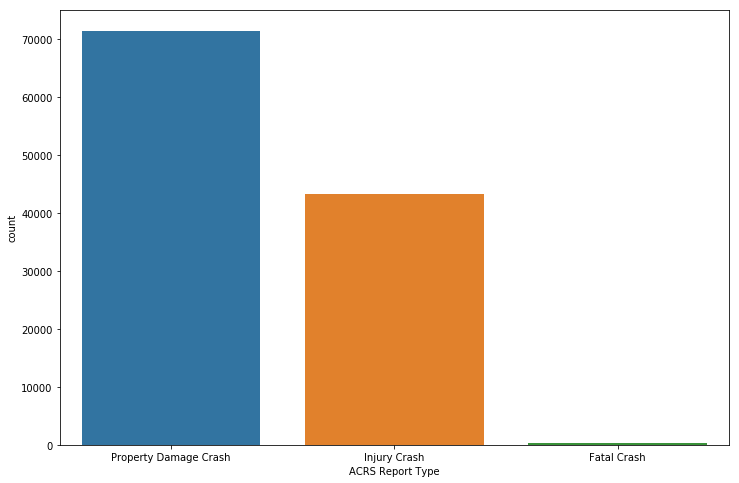

In [23]:
import seaborn as sns
fig = plt.figure()

fig.set_size_inches(12,8)
sns.countplot(x='ACRS Report Type',data=df2)

In [69]:
data['Traffic Control'].value_counts()

NO CONTROLS                45413
TRAFFIC SIGNAL             38580
STOP SIGN                   8275
OTHER                       1354
FLASHING TRAFFIC SIGNAL     1327
YIELD SIGN                  1267
PERSON                       191
UNKNOWN                      161
WARNING SIGN                 110
RAILWAY CROSSING DEVICE       35
SCHOOL ZONE SIGN DEVICE       10
Name: Traffic Control, dtype: int64

In [72]:
df2['Traffic Control'].value_counts()

NO CONTROLS                26645
TRAFFIC SIGNAL             19361
STOP SIGN                   4444
OTHER                        776
FLASHING TRAFFIC SIGNAL      726
YIELD SIGN                   669
UNKNOWN                      115
PERSON                       107
WARNING SIGN                  77
RAILWAY CROSSING DEVICE       18
SCHOOL ZONE SIGN DEVICE        7
Name: Traffic Control, dtype: int64

In [54]:
df2["ACRS Report Type"].value_counts()

Property Damage Crash    1723
Injury Crash              905
Fatal Crash               133
Name: ACRS Report Type, dtype: int64

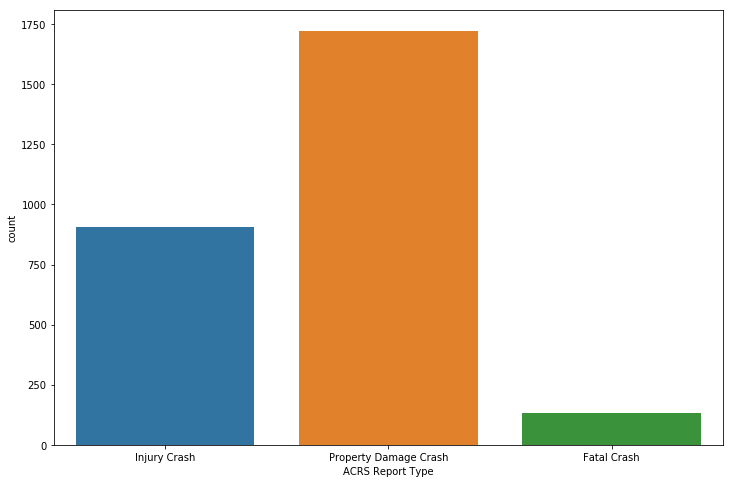

In [55]:
fig = plt.figure()

fig.set_size_inches(12,8)
sns.countplot(x='ACRS Report Type',data=df2)

"Driver at Fault" has a high ratio in "Fatal Crash", that make sense.  

In [56]:
data["Related Non-Motorist"].value_counts()

PEDESTRIAN                 2583
BICYCLIST                   771
OTHER                       151
OTHER CONVEYANCE             36
MACHINE OPERATOR/RIDER       15
OTHER PEDALCYCLIST            4
OTHER, PEDESTRIAN             4
BICYCLIST, PEDESTRIAN         3
BICYCLIST, OTHER              3
IN ANIMAL-DRAWN VEH           1
OTHER, OTHER CONVEYANCE       1
Name: Related Non-Motorist, dtype: int64

In [57]:
df2["Related Non-Motorist"].value_counts()

PEDESTRIAN                208
BICYCLIST                  43
OTHER                       2
OTHER CONVEYANCE            1
OTHER, PEDESTRIAN           1
BICYCLIST, PEDESTRIAN       1
MACHINE OPERATOR/RIDER      1
Name: Related Non-Motorist, dtype: int64

## the high number of Pedestrian and bicyclist casualties reflects the inherent vulnerablity of these road users, also insuffient attention to their needs in policy making? 

In [59]:
data["Collision Type"].value_counts()

SAME DIR REAR END               39332
STRAIGHT MOVEMENT ANGLE         19210
OTHER                           12555
SINGLE VEHICLE                  10477
SAME DIRECTION SIDESWIPE        10309
HEAD ON LEFT TURN                8668
SAME DIRECTION LEFT TURN         2469
SAME DIRECTION RIGHT TURN        2446
HEAD ON                          2442
OPPOSITE DIRECTION SIDESWIPE     1862
ANGLE MEETS LEFT TURN            1350
ANGLE MEETS RIGHT TURN            777
SAME DIR REND LEFT TURN           559
SAME DIR REND RIGHT TURN          549
UNKNOWN                           467
ANGLE MEETS LEFT HEAD ON          466
SAME DIR BOTH LEFT TURN           466
OPPOSITE DIR BOTH LEFT TURN       216
Name: Collision Type, dtype: int64

In [60]:
data["Injury Severity"].value_counts()

NO APPARENT INJURY          93678
POSSIBLE INJURY             11843
SUSPECTED MINOR INJURY       8421
SUSPECTED SERIOUS INJURY      973
FATAL INJURY                   87
Name: Injury Severity, dtype: int64

In [61]:
df2["Injury Severity"].value_counts()

NO APPARENT INJURY          2296
POSSIBLE INJURY              235
SUSPECTED MINOR INJURY       165
FATAL INJURY                  36
SUSPECTED SERIOUS INJURY      29
Name: Injury Severity, dtype: int64

In [22]:
df2["Route Type"].value_counts()

Maryland (State)        51892
County                  37023
Municipality             6217
US (State)               4852
Interstate (State)       2189
Other Public Roadway      730
Government                502
Ramp                      408
Service Road               38
Unknown                    15
Name: Route Type, dtype: int64

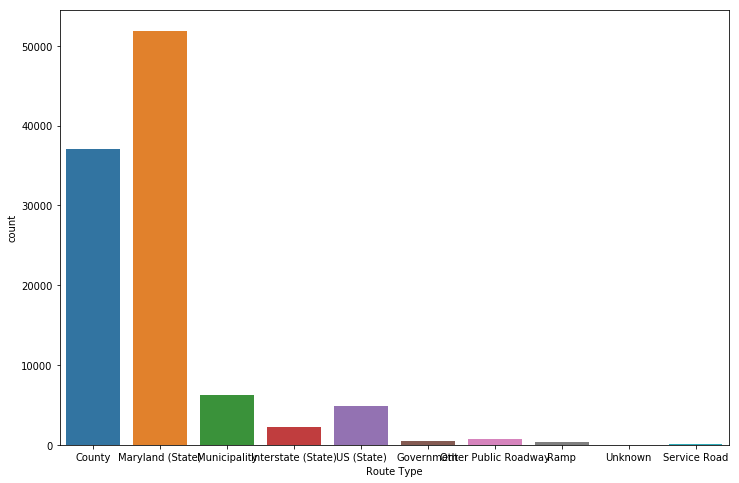

In [25]:
fig = plt.figure()
fig.set_size_inches(12,8)
sns.countplot(x='Route Type',data=df2)

In [62]:
data["Speed Limit"].value_counts()

35    32051
40    24037
30    15735
25    15723
45     8901
15     4060
50     3383
0      3093
55     2710
5      2568
10     1964
20      687
65       48
60       40
70        2
Name: Speed Limit, dtype: int64

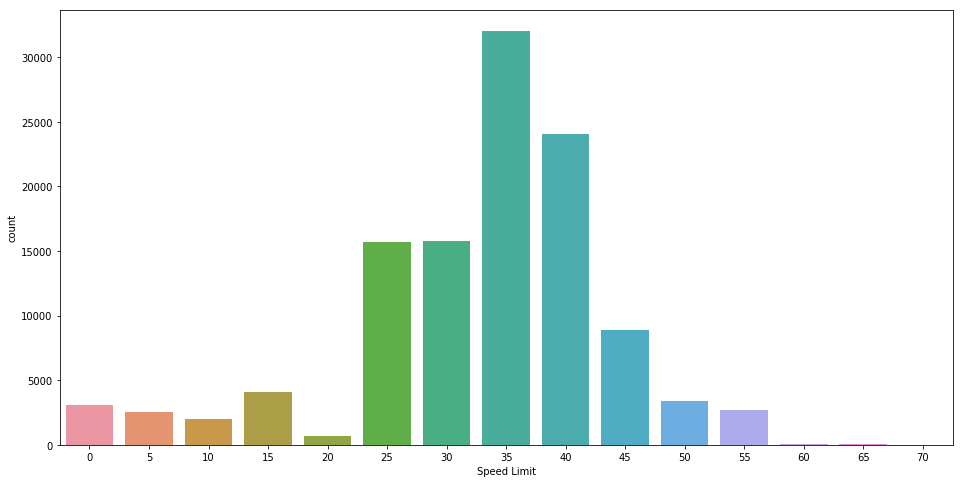

In [63]:
fig = plt.figure()
fig.set_size_inches(16,8)
sns.countplot(x='Speed Limit',data=data)

In [64]:
df2["Speed Limit"].value_counts()

35    803
40    557
25    403
30    335
45    177
15    126
5      99
0      75
10     63
50     53
55     49
20     21
Name: Speed Limit, dtype: int64

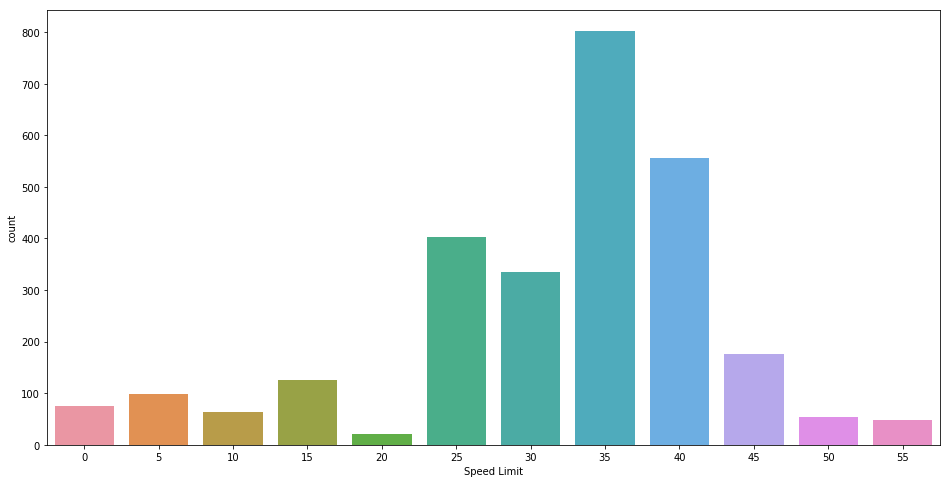

In [65]:
fig = plt.figure()
fig.set_size_inches(16,8)
sns.countplot(x='Speed Limit',data=df2)

In [29]:
df2["Light"].value_counts()

DAYLIGHT                    78581
DARK LIGHTS ON              25384
DARK NO LIGHTS               3355
DUSK                         2711
DAWN                         2312
DARK -- UNKNOWN LIGHTING     1044
UNKNOWN                       418
OTHER                         245
Name: Light, dtype: int64

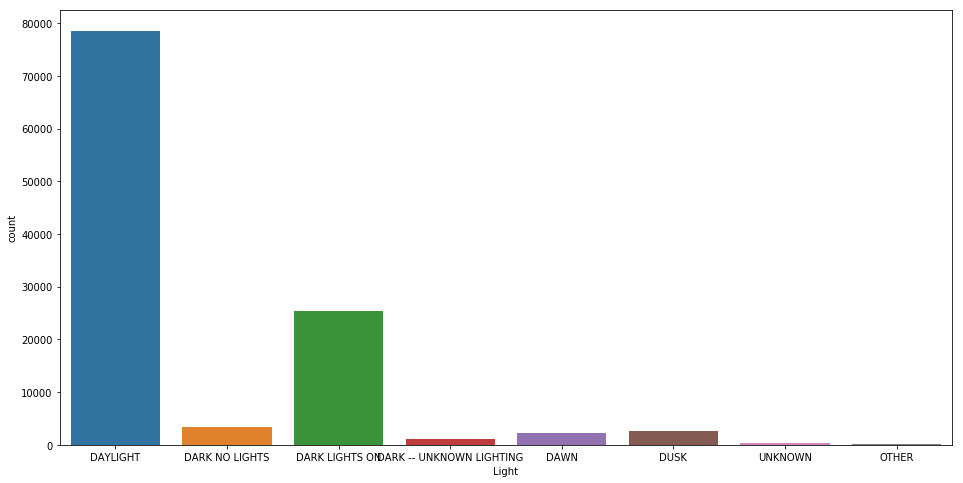

In [28]:
fig = plt.figure()
fig.set_size_inches(16,8)
sns.countplot(x='Light',data=df2)


In [33]:
df2["Weather"].value_counts().head(5)

CLEAR      76306
RAINING    14470
CLOUDY     12223
SNOW        1159
FOGGY        434
Name: Weather, dtype: int64

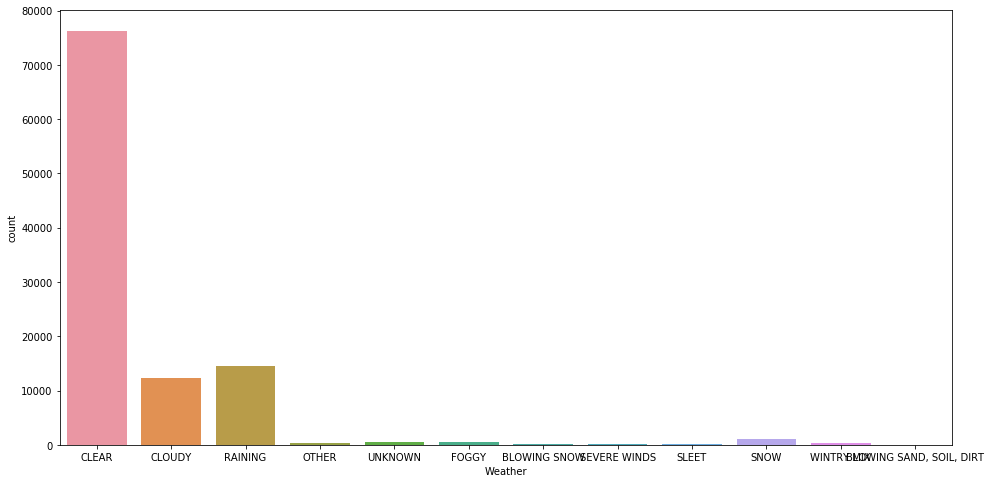

In [31]:
fig = plt.figure()
fig.set_size_inches(16,8)
sns.countplot(x='Weather',data=df2)

In [4]:

df.head(20)


Accident    Year    Make Gender
0        No  2012.0    FORD      F
1        No  2019.0  NISSAN      F
2        No  1998.0   HONDA      F
3        No  2009.0    TOYT      F
4        No  2015.0     BMW      M
5        No  1998.0   LEXUS      M
6       Yes  2009.0  TOYOTA      M
7        No  2015.0    FORD      M
8        No  2015.0    FORD      M
9       Yes  2015.0    FORD      M
10       No  2009.0    SUBU      M
11       No  2007.0   ACURA      M
12       No  2007.0    HOND      M
13       No  2015.0     BMW      M
14       No  2006.0    HYUN      F
15       No  2008.0     BMW      M
16       No  2011.0    VOLK      M
17       No  2006.0   ACURA      M
18       No  2018.0   HONDA      F
19       No  2016.0   CHRYS      M

In [9]:
df["Make"].value_counts()

TOYOTA            1123
HONDA              918
FORD               662
TOYT               564
NISSAN             412
HOND               374
BMW                231
HYUNDAI            197
CHEV               192
LEXUS              186
ACURA              178
NISS               176
CHEVY              143
MERZ               143
JEEP               142
DODGE              131
SUBARU             113
HYUN               110
MERCEDES           105
KIA                 97
CHEVROLET           92
MAZDA               87
AUDI                80
GMC                 78
ACUR                67
VOLK                66
SUBA                63
NONE                56
CHRYSLER            55
VOLVO               52
                  ... 
NISSN                1
CHEVY VAN            1
MAZ                  1
FORD`                1
GENERAL MOTORS       1
TOTOTA               1
MASERATI             1
SHEV                 1
LUXUS                1
LAND                 1
HIOND                1
CHWVY                1
1990       

In [7]:
df["Gender"].value_counts()

M    4557
F    3513
Name: Gender, dtype: int64

In [26]:
year = df["Year"].value_counts().head(20)
year

2012.0    540
2013.0    528
2011.0    498
2014.0    487
2015.0    475
2008.0    461
2007.0    456
2006.0    452
2010.0    433
2005.0    428
2009.0    378
2004.0    362
2016.0    355
2003.0    345
2002.0    285
2000.0    241
2001.0    238
2017.0    222
1999.0    171
1998.0    124
Name: Year, dtype: int64

In [9]:
df["Accident"].value_counts()


No     7337
Yes     733
Name: Accident, dtype: int64

In [15]:
total_counts=8070
data['Race'].value_counts()/total_counts

WHITE              0.438414
BLACK              0.260347
HISPANIC           0.144734
ASIAN              0.093556
OTHER              0.060719
NATIVE AMERICAN    0.002230
Name: Race, dtype: float64

In [12]:
data["Arrest Type"].value_counts()

A - Marked Patrol                       6781
B - Unmarked Patrol                      514
O - Foot Patrol                          476
L - Motorcycle                           199
Q - Marked Laser                          45
M - Marked (Off-Duty)                     26
E - Marked Stationary Radar               12
R - Unmarked Laser                         5
N - Unmarked (Off-Duty)                    5
I - Marked Moving Radar (Moving)           2
G - Marked Moving Radar (Stationary)       2
C - Marked VASCAR                          2
S - License Plate Recognition              1
Name: Arrest Type, dtype: int64

patrol cars are still by far the dominant source of citations.

In [79]:
import sys
import re

data.replace(['Yes', 'No'], [1, 0])
df['Violation'] = pd.Series(1, index=df.index)

df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'], dayfirst=True)
df['year'], df['month'] = df['Date Of Stop'].dt.year, df['Date Of Stop'].dt.month

import matplotlib.pyplot as plt

df2 = df[['Violation','year']]

count = df2.groupby('year')
totalsum = count.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'violation number per year')
plt.ylabel('count')
plt.show()

KeyError: ('Date Of Stop', 'occurred at index 0')

In [17]:
import numpy as np
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
data["Longitude"] = data["Longitude"].apply(parse_float)
data["Latitude"] = data["Latitude"].apply(parse_float)

start_year = data.data['year'].min()
end_year = data.crashYear.max()

fatal = data['fatalCount'].sum()
major = data['seriousInjuryCount'].sum()
minor = data['minorInjuryCount'].sum()

print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_year, end_year,fatal))
print("While the total number of serious injuries and minor injuries in car accidents reach {}, {} respectively".format(major,minor))
#respectively in the same period".format(start_year, end_year,fatal, minor, major))


In [34]:
Belt = data.Belts.value_counts()
Belt

No     7708
Yes     362
Name: Belts, dtype: int64

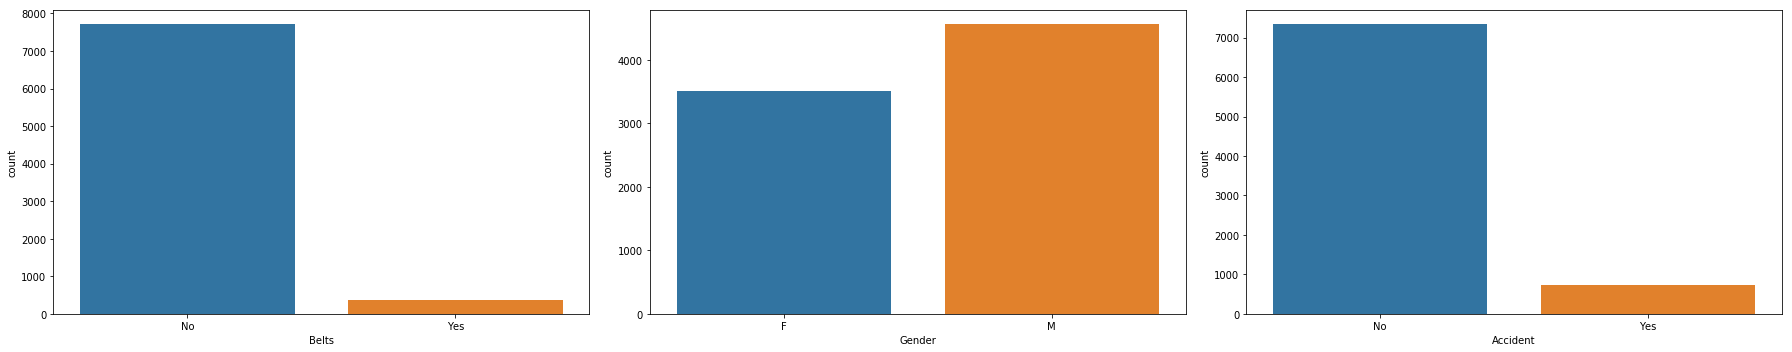

In [42]:
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize = (25, 5));

sns.countplot(x='Belts', data=data, ax=ax[0]);
sns.countplot(x='Gender',  data=data, ax=ax[1]);
sns.countplot(x='Accident',  data=data, ax=ax[2]);
#[ax[i].set_xlabel('Crash Year') for i in range(3)]
plt.tight_layout()

In [77]:
data['Driverless Vehicle'].value_counts()

No         114480
Unknown       522
Name: Driverless Vehicle, dtype: int64

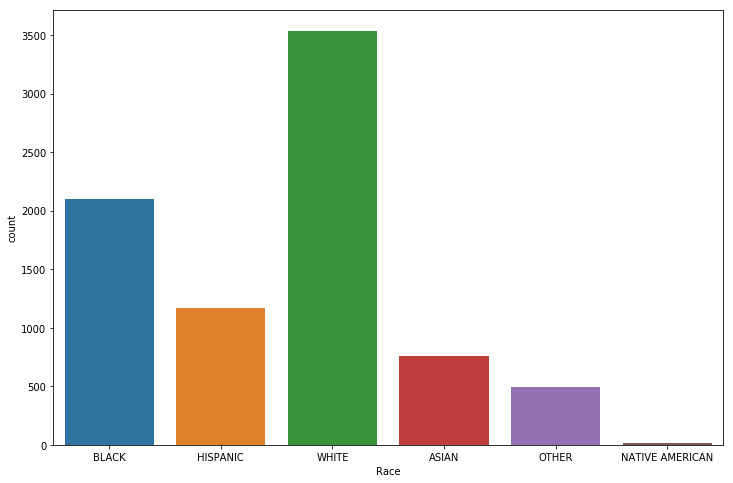

In [46]:
fig = plt.figure()

fig.set_size_inches(12,8)
sns.countplot(x='Race',data=data)

## Different groups of people have different exposures to risk. 

(array([ 94.,  54.,  34.,  19.,  20.,  27.,  87., 210., 259., 337., 368.,
        624., 862., 702., 592., 697., 671., 662., 455., 313., 274., 255.,
        258., 196.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

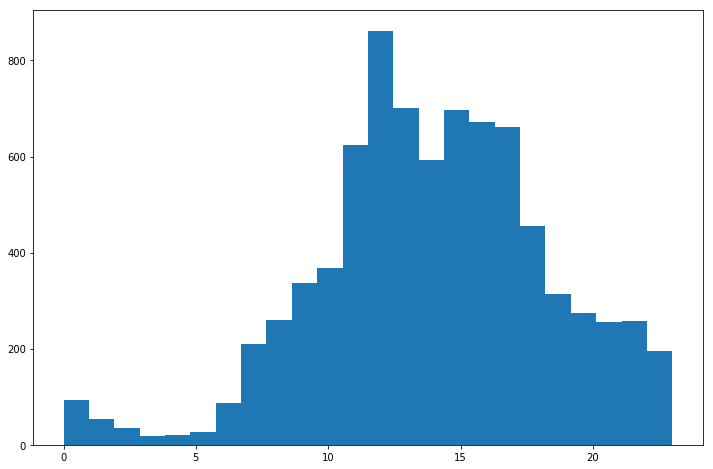

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_subplot(111)

fig.set_size_inches(12,8)
plt.hist(data["date"].dt.hour, bins=24)


(array([ 855., 1483., 1966., 1632., 1195.,  512.,  427.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

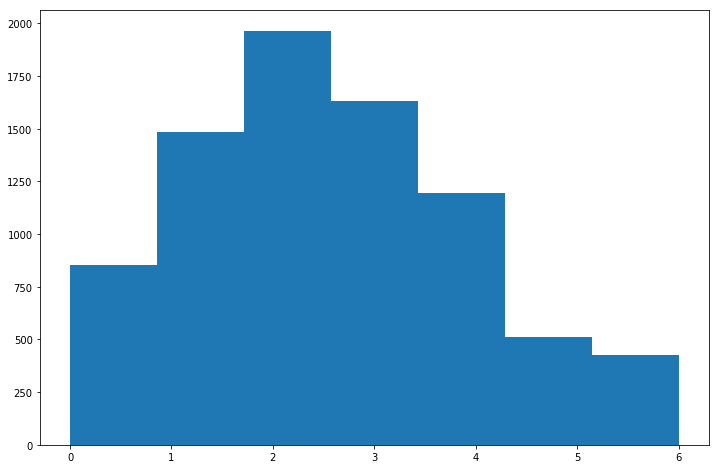

In [35]:
fig = plt.figure()

fig.set_size_inches(12,8)
plt.hist(data["date"].dt.weekday, bins=7)

In [145]:
wea = pd.read_csv("2268125.csv")

wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
STATION    225 non-null object
NAME       225 non-null object
DATE       225 non-null object
DAPR       2 non-null float64
MDPR       2 non-null float64
PRCP       223 non-null float64
SNOW       69 non-null float64
SNWD       6 non-null float64
WESD       5 non-null float64
WESF       4 non-null float64
dtypes: float64(7), object(3)
memory usage: 17.7+ KB


In [146]:
wea.head(10)

STATION                        NAME        DATE  DAPR  MDPR  PRCP  \
0  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-01   NaN   NaN  0.00   
1  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-02   NaN   NaN  0.00   
2  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-03   NaN   NaN  0.16   
3  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-04   NaN   NaN  0.22   
4  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-05   NaN   NaN  0.13   
5  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-06   NaN   NaN  0.00   
6  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-07   NaN   NaN  0.00   
7  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-08   NaN   NaN  0.23   
8  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-09   NaN   NaN  0.00   
9  US1MDMG0128  NORTH POTOMAC 3.8 N, MD US  2020-01-10   NaN   NaN  0.00   

   SNOW  SNWD  WESD  WESF  
0   0.0   NaN   NaN   NaN  
1   0.0   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  
5   0.0   NaN   NaN   NaN  
6   0.0   NaN   NaN   NaN  
7   1.4   1.0   0.1   0.2  
8   0.0   0.5   0.1   0.0  
9   0.0   0.0   0.0   NaN